#### Problem Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

- A single cell estimate of the population 16+ for each state.
- Controls for Hispanic Origin by age and sex.
- Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings ('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The above data frame is information about the first 5 rows and the last five rows of the data sets. 

We have 32,560 rows and 13 columns in the dataset

The 13 columns are entails categorical and numerical.  

Our target variable contain fixed amount numerical data, therefore I consider this to be classification problem. 

In [3]:
data.shape

(32560, 15)

# Exploratory Data Analysis (EDA)

In [4]:
# dropping duplicates 
data.drop_duplicates(inplace = True )
print('Shape of data after removing duplicates:', data.shape)

Shape of data after removing duplicates: (32536, 15)


24 duplicates values was dropped 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


According to the information of the dataset 

Range Index: 32,560 entries/rows 
    
Data columns: 13 
    
No nulls values 

Data types: 6 columns are int64, while the remaining 9 columns are object data. 
    
memory usage 3.7+ MB 

In [6]:
obj_col = data.select_dtypes(include='object')
print('categorical columns:',obj_col.columns)

print('\n')

int_col = data.select_dtypes(include='int64')
print('numerical columns:',int_col.columns)

categorical columns: Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


numerical columns: Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')


In [7]:
# Statistical summary of numerical columns
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The Count values are same in all columns, meaning they are no missing values that we will confirm as we move further

Mean values in capital_gain and capital_loss is smaller than the std which is abnormal.

The Min, 25%,50% and 75% have same zero values in Capital_gain,Capital_Loss which can cause skenwess. In this same columns the Max is far beyond those zero values, I can observe outliers. 




# Checking missing values 

In [8]:
data.isnull().sum().to_frame('Missing values')

,Missing values
Age,0
Workclass,0
Fnlwgt,0
Education,0
Education_num,0
Marital_status,0
Occupation,0
Relationship,0
Race,0
Sex,0


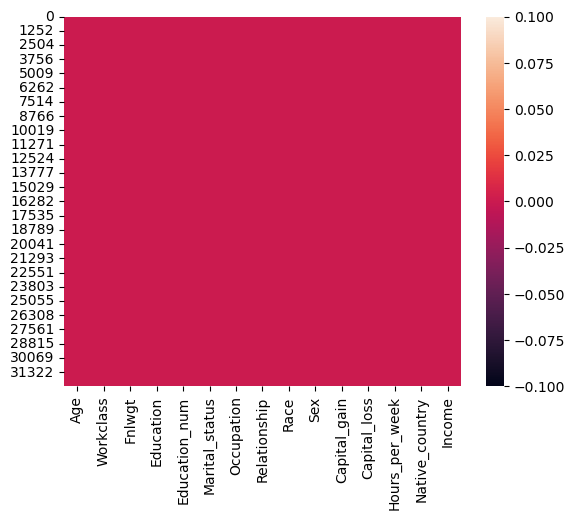

In [9]:
plt.figure()
sns.heatmap(data.isnull())
plt.show()

There are no missing values 

In [10]:
data.nunique().to_frame('Unique Value')

,Unique Value
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


These are the columns unique values 

In [11]:
# Checking values counts for object data 
for i in  obj_col:
    print(obj_col[i].value_counts())
    print('*'*75)

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
***************************************************************************
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
***************************************************************************
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-a

The above result shows the count value of categorical columns: 

In the workclass column there is a class/group name:(?) which has a count values of 1836. 
    
Again, in Occupation column there is a class/group name:(?) whch has a count values of 1843

In Native_Country columns there is a class/group name:(?) which has a count values of 582
    
I am observing an Inbalace data on the target variable, lesser than equal (<=50k) has values of 24697 count while greater than 50k  has a  values count  of 7839.There is a huge difference, moving further the data need to be balance for machine learning and to avoid biaseness. 

In [12]:
# Checking values counts for float64 data 
for i in int_col:
    print(int_col[i].value_counts())
    print('*'*75)

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
***************************************************************************
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
***************************************************************************
9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64
***************************************************************************
0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64
****

The above result shows the values counts of the numerical columns and as we can clearly see there are no repeated values and black spaces. 

# Replacing the '?' class to 'Others' 

In [13]:
obj_col['Workclass'].replace({' ?':' Others'},inplace=True)
obj_col['Occupation'].replace({' ?':' Others'},inplace=True)
obj_col['Native_country'].replace({' ?':' Others'},inplace=True)

In [14]:
for i in  obj_col[['Workclass','Occupation','Native_country']]:
    print(obj_col[i].value_counts())
    print('*'*75)

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 Others               1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
***************************************************************************
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Others               1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64
***************************************************************************
 United-States                 29152
 Mexico                          639
 Others                          582
 Philippines                

The above result shows i have successfully replaced the question mark (?) class with a meaning value (Others).

In [15]:
data['Workclass']= obj_col['Workclass']
data['Occupation']= obj_col['Occupation']
data['Native_country']= obj_col['Native_country']

Re-assigning change to main data frame 

# Univariate Analysis

### Visualizing Categorical columns

In [16]:
print(f'categorical columns:',obj_col.columns)

categorical columns: Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


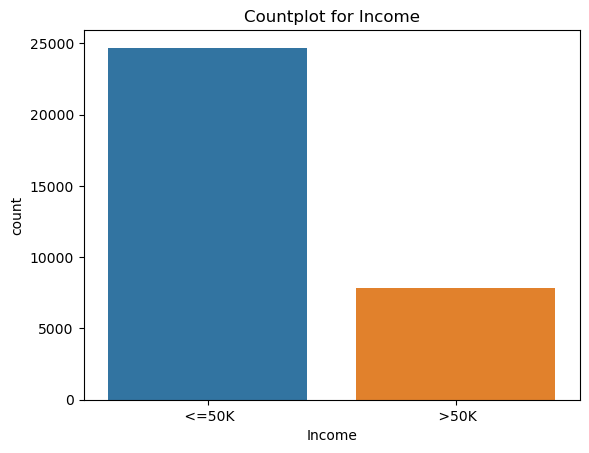

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64


In [20]:
sns.countplot(x='Income',data = data)
plt.title('Countplot for Income')
plt.show()

print(data['Income'].value_counts())

According above plot people who make less than 50k are more than people who make more than 50k. Remeber this is our target  variable since we have majority class here our data is imbalace. Moving foward we will balnace the data. 

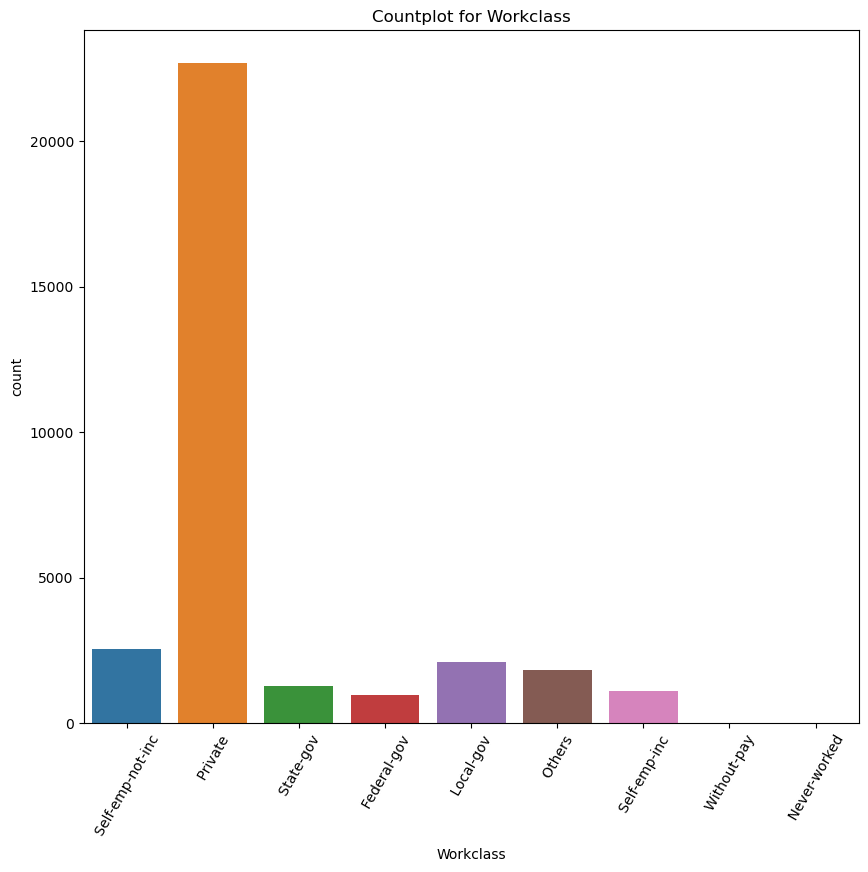

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 Others               1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


In [209]:
plt.figure(figsize=(10,9))
sns.countplot(x='Workclass',data = data)
plt.xticks(rotation=60)
plt.title('Countplot for Workclass')
plt.show()

print(data['Workclass'].value_counts())

People who workclass are private are more than any other work class, fellowed by self-employed,local gov, others and State-gov. The  least are people who have never worked

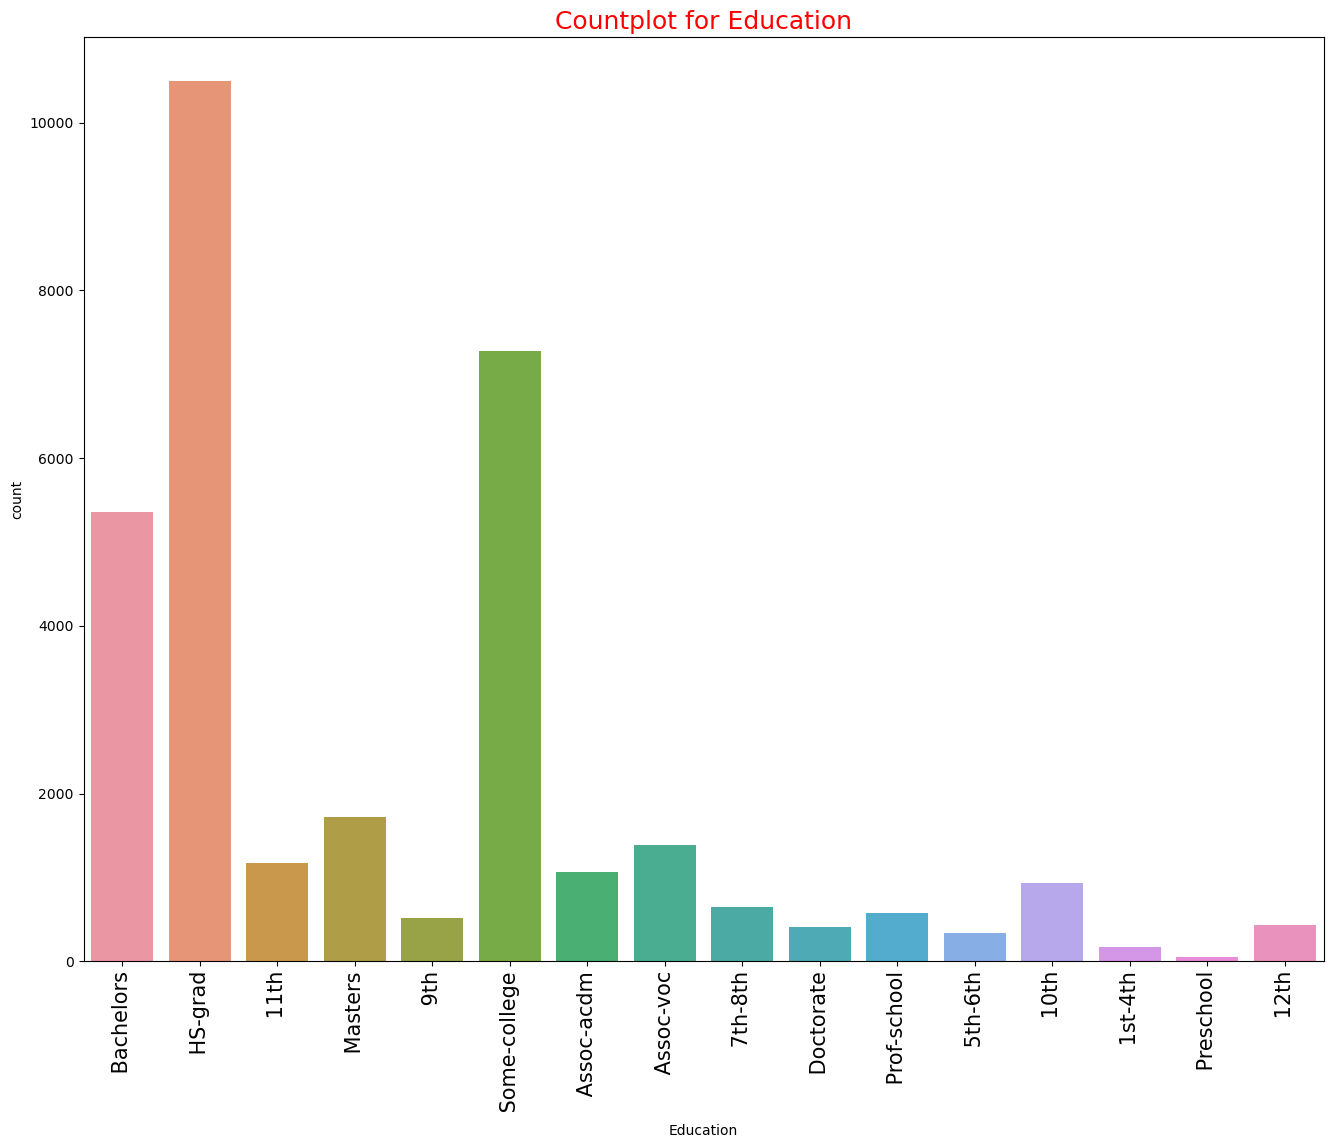

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


In [210]:
plt.figure(figsize=(16,12))
sns.countplot(x='Education',data = data)
plt.xticks(rotation=90,fontsize= 15)
plt.title('Countplot for Education', fontsize=18, color ='r')
plt.show()

print(data['Education'].value_counts())

The above plot shows people with HS-grade education are more than any other education qualification, fellowed by some-college,Bachelors and Masters, then the least education are people with Preschool. 

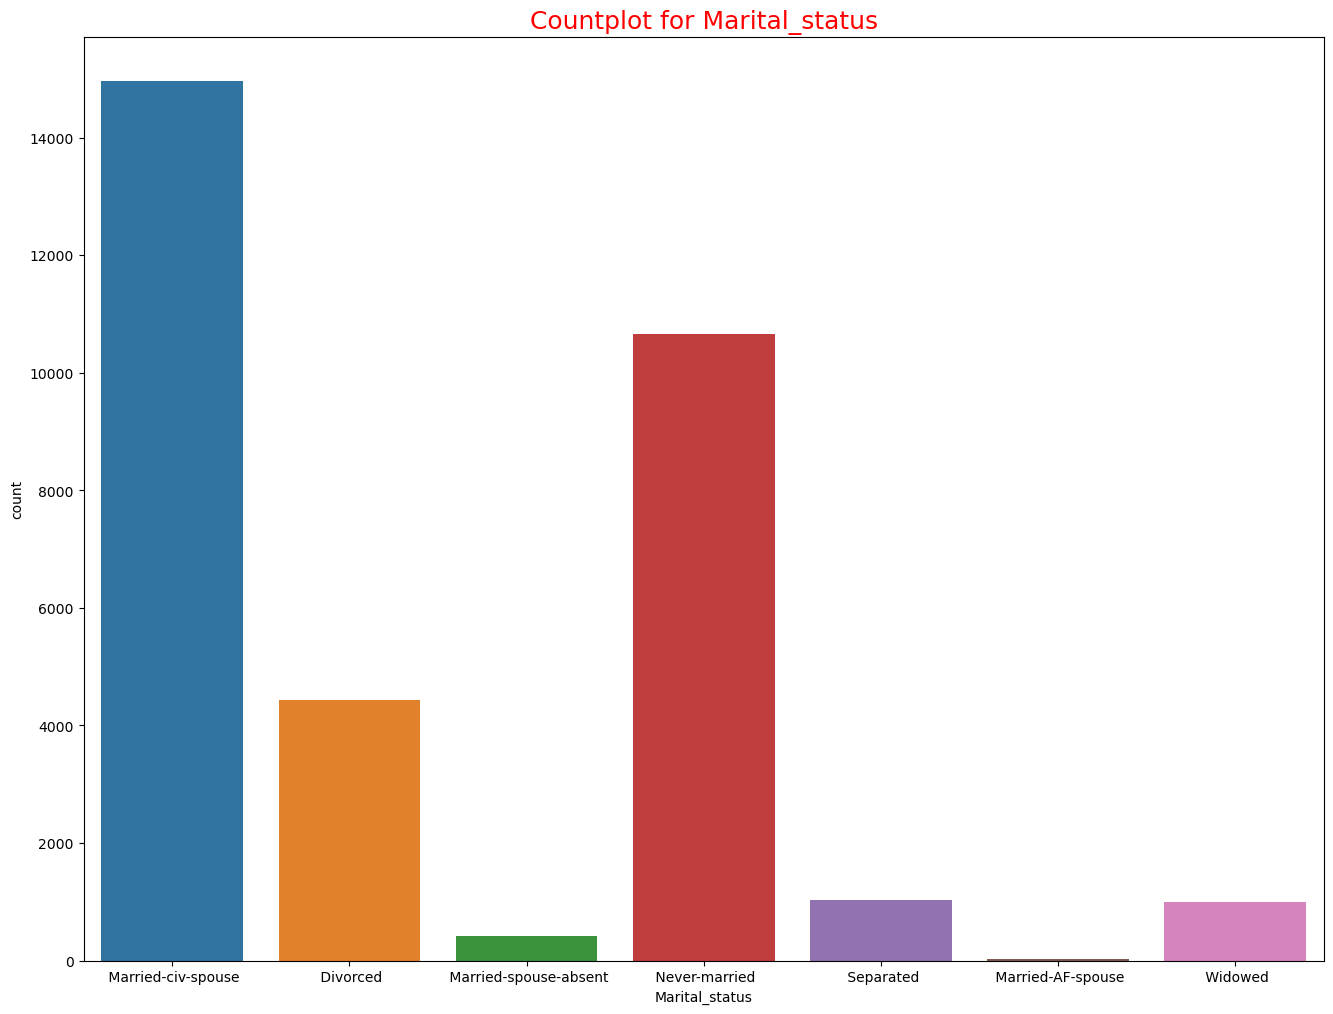

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


In [211]:
plt.figure(figsize=(16,12))
sns.countplot(x='Marital_status',data = data)
plt.title('Countplot for Marital_status', fontsize=18, color ='r')
plt.show()

print(data['Marital_status'].value_counts())

The above plot shows the marital status of people and as we can see people who are married to civilian are the majority, fellowed by people who never married, and divorces. While the least are people who married to Armed forces. 

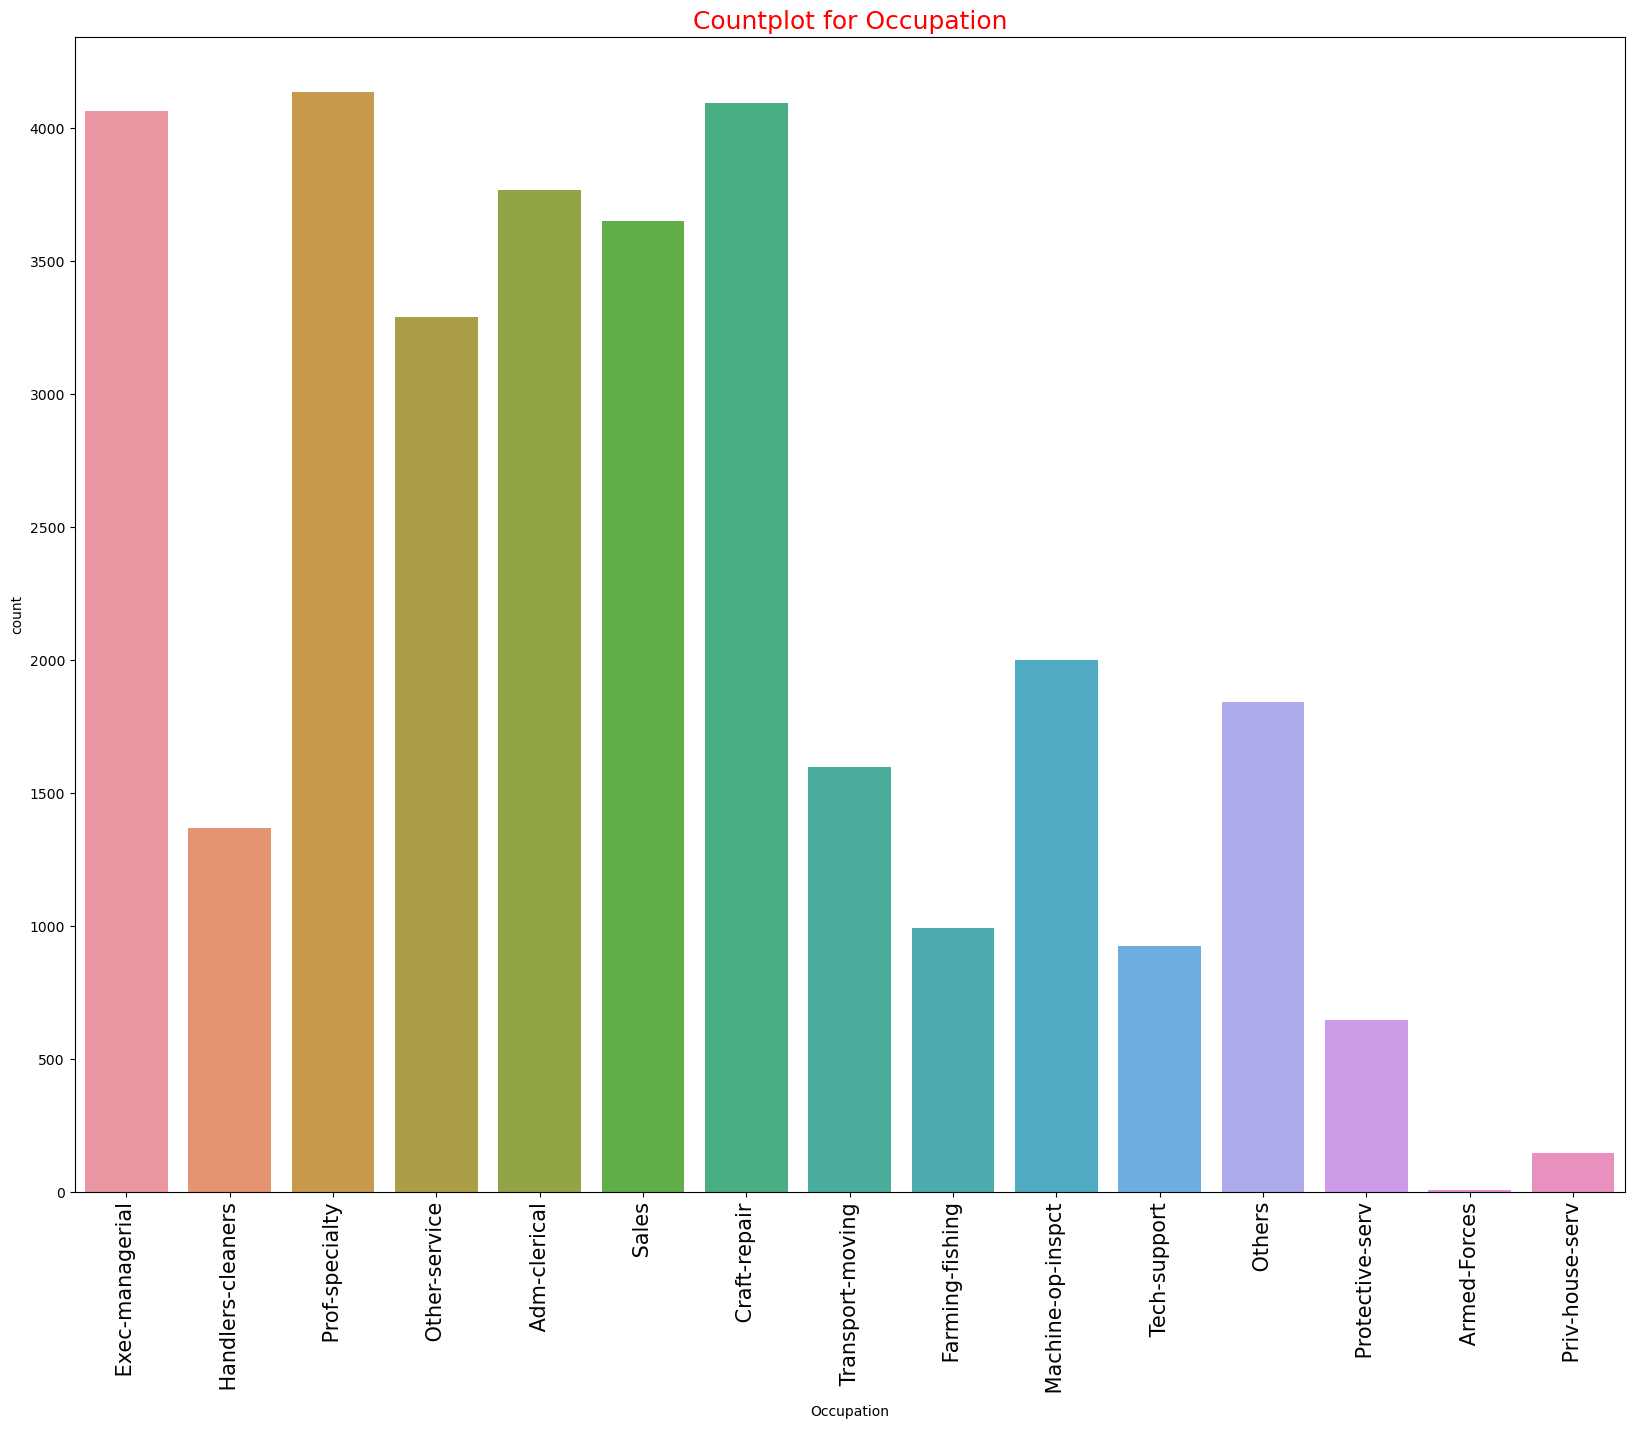

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Others               1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


In [21]:
plt.figure(figsize=(20,15))
sns.countplot(x='Occupation',data = data)
plt.xticks(rotation=90,fontsize= 15)
plt.title('Countplot for Occupation', fontsize=18, color ='r')
plt.show()

print(data['Occupation'].value_counts())

The above plot shows that Prof-specialty are people with the highest occupation, fellowed by Cratf-repair then Exec-managerial. The least occupation of people are Armed-Forces

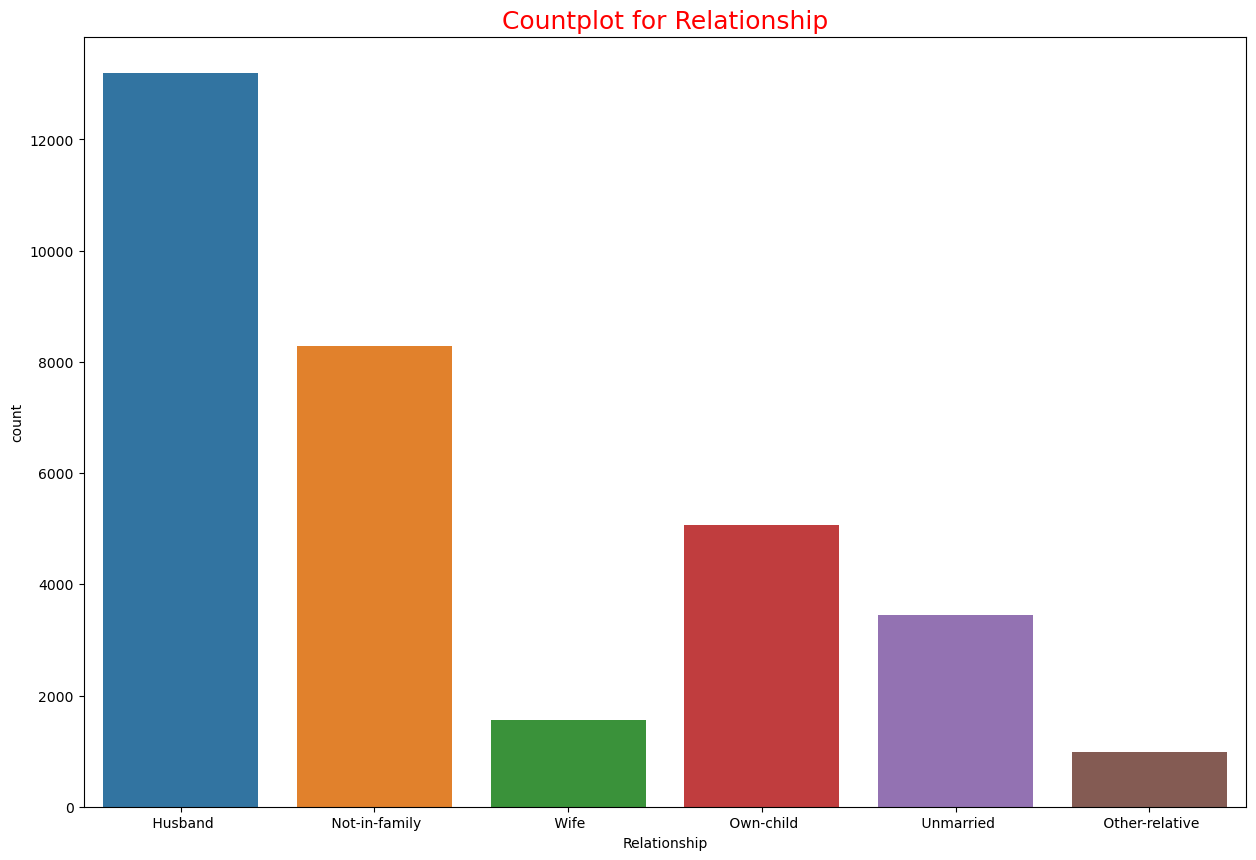

 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


In [22]:
plt.figure(figsize=(15,10))
sns.countplot(x='Relationship',data = data)
plt.title('Countplot for Relationship', fontsize=18, color ='r')
plt.show()

print(data['Relationship'].value_counts())

The above plot shows that husband class are the majority in relationship status fellowed by not-in-family and Own-child and the least in this cagetory is other-relative

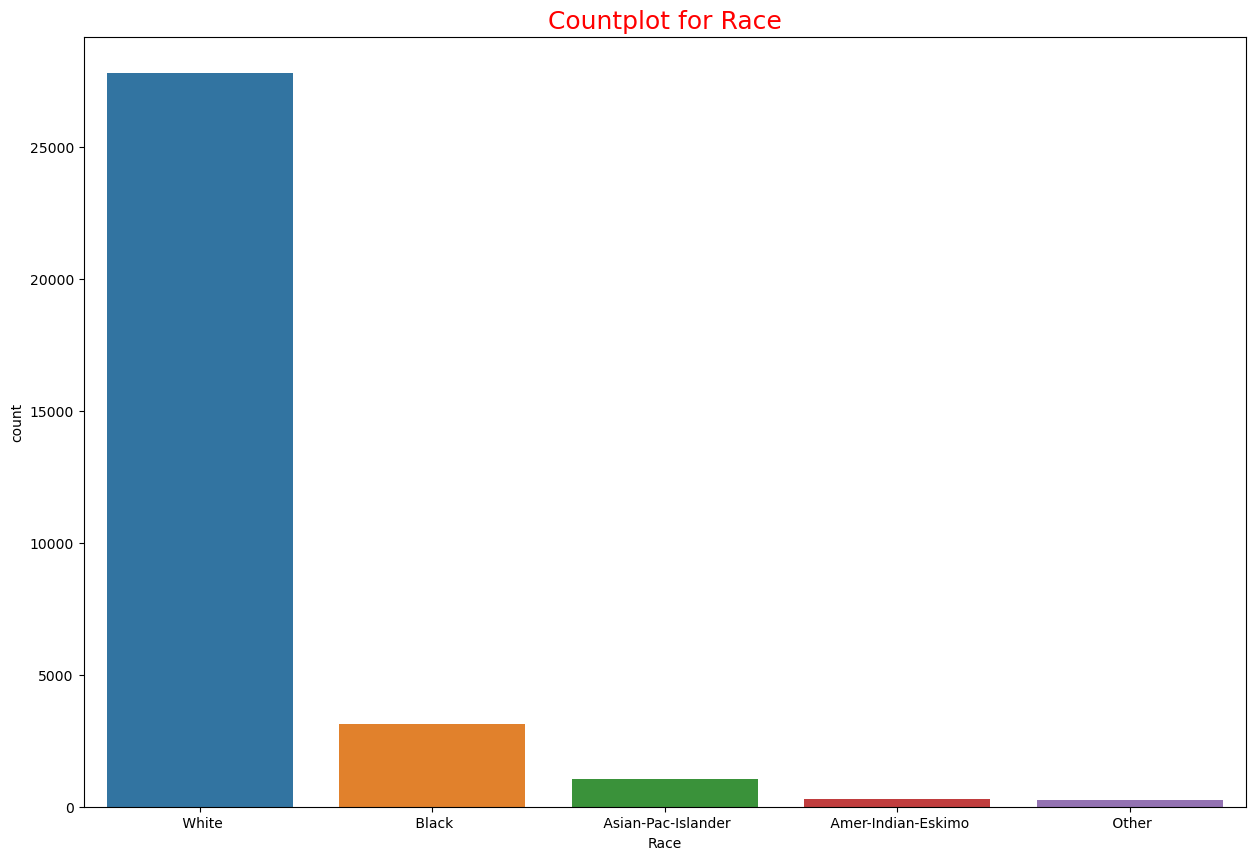

 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


In [23]:
plt.figure(figsize=(15,10))
sns.countplot(x='Race',data = data)
plt.title('Countplot for Race', fontsize=18, color ='r')
plt.show()

print(data['Race'].value_counts())

According to the above plot, people who are White race are the majority fellowed by Black and Asia-Pac-islander, the least are other race. 

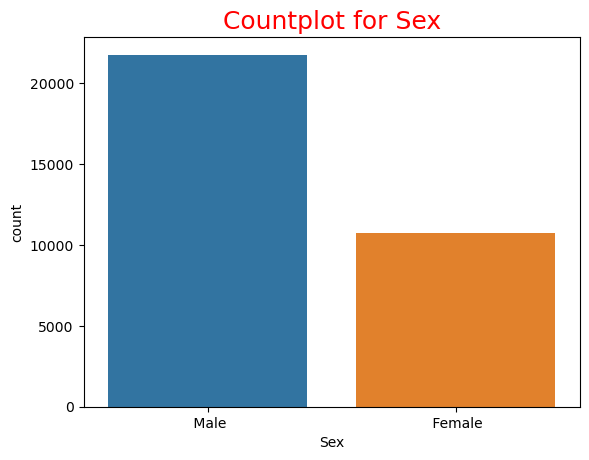

 Male      21774
 Female    10762
Name: Sex, dtype: int64


In [24]:
plt.figure()
sns.countplot(x='Sex',data = data)
plt.title('Countplot for Sex', fontsize=18, color ='r')
plt.show()

print(data['Sex'].value_counts())

The above plots shows that Male are more than Female. 

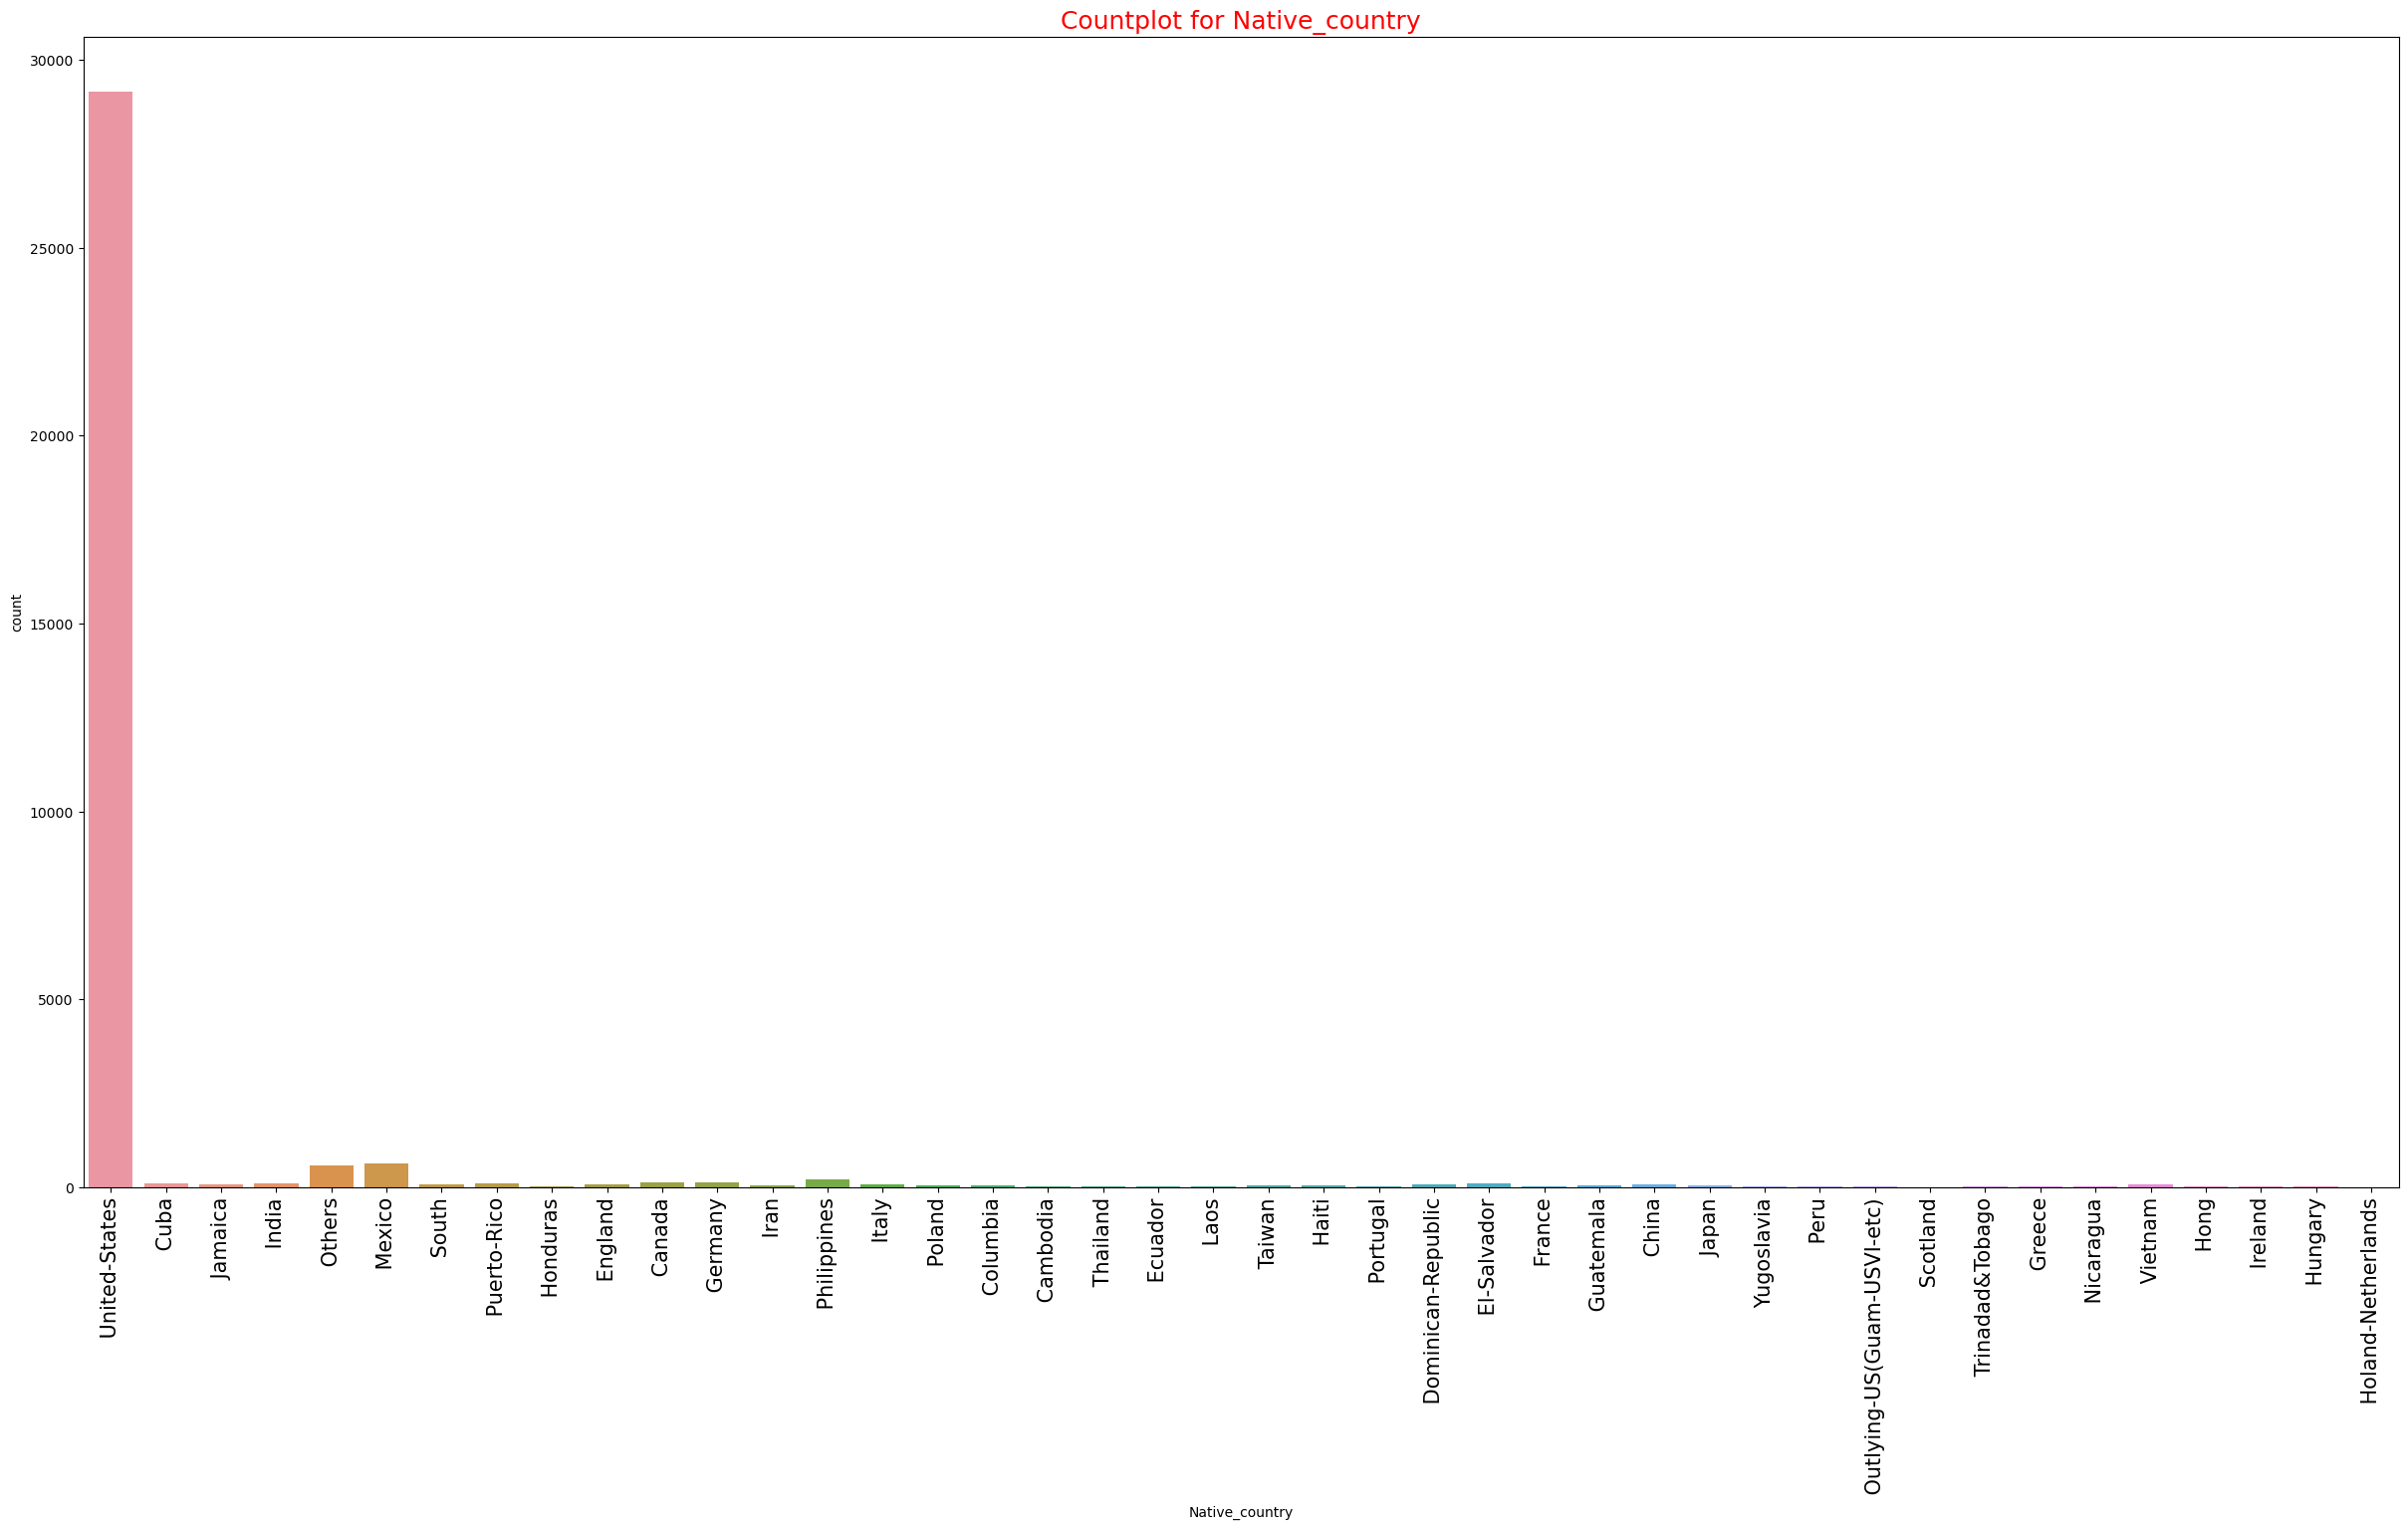

 United-States                 29152
 Mexico                          639
 Others                          582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [25]:
plt.figure(figsize=(30,15))
sns.countplot(x='Native_country',data = data)
plt.xticks(rotation=90,fontsize= 15)
plt.title('Countplot for Native_country', fontsize=18, color ='r')
plt.show()

print(data['Native_country'].value_counts())

The above graph show count of Native_country  and we can see that United State has majority of people fellowed by Mexico and Others netives. the least in Holand-Netherlands 

# Bivariate Analysis 

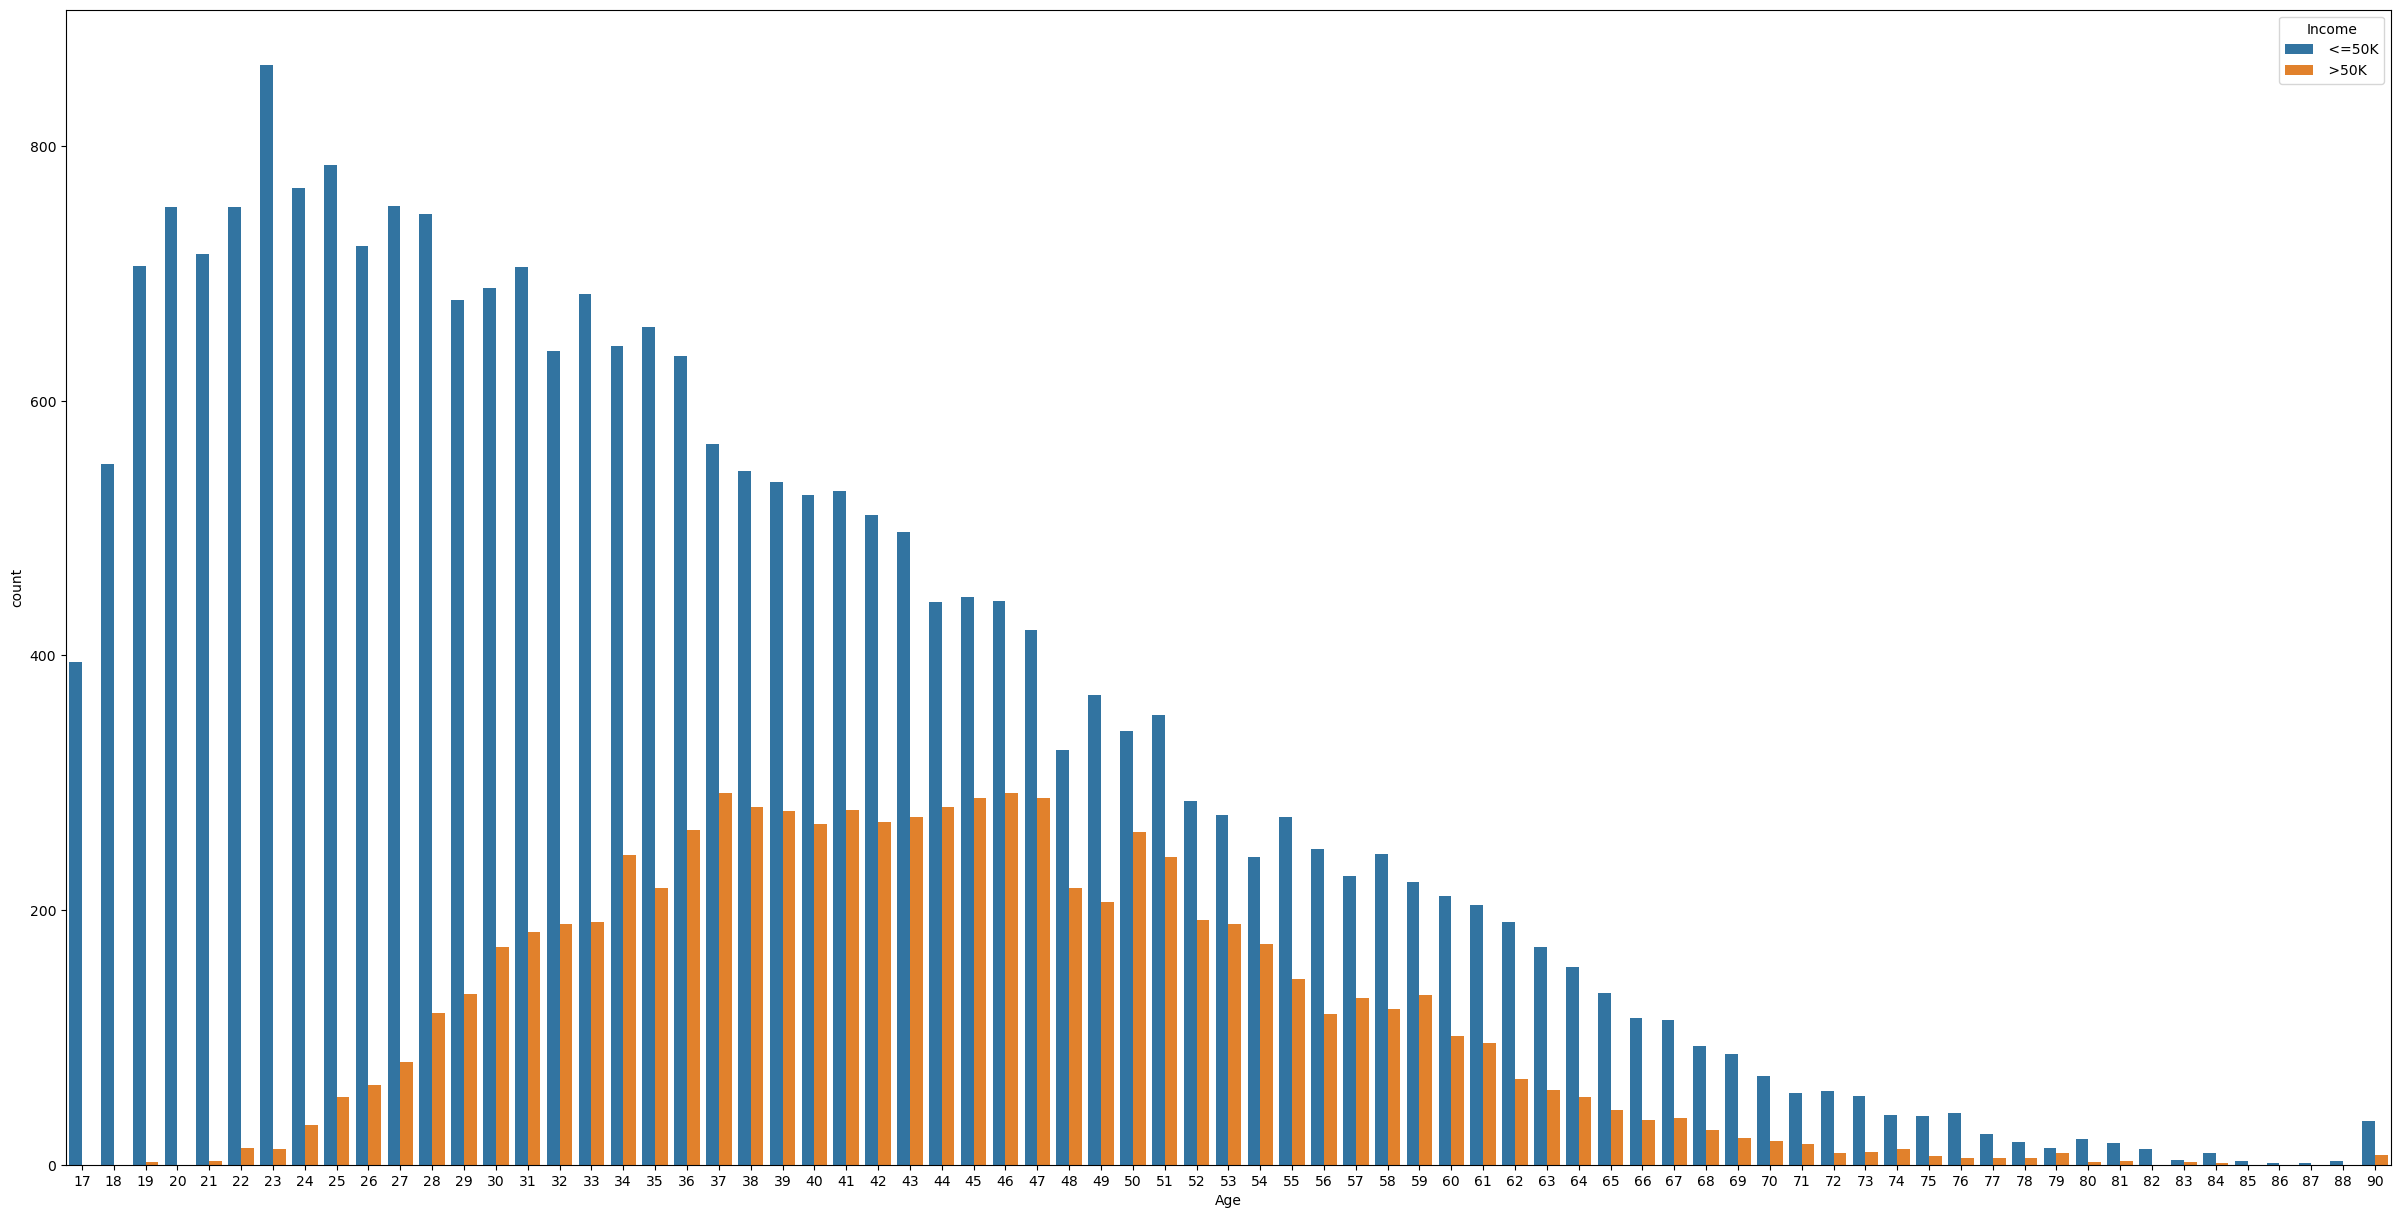

In [26]:
plt.figure(figsize=(30,15))
sns.countplot(x='Age',hue='Income', data = data)
plt.show()

According to the above graph, younger people barely make more than 50k. At age 19 only few of them make more than >50k. At early 30s to age mid 50 most of them make more than 50k. At age 55 - late 80s the people making >50k drops in numbers. Overall people making <=50k are much than people making >50.

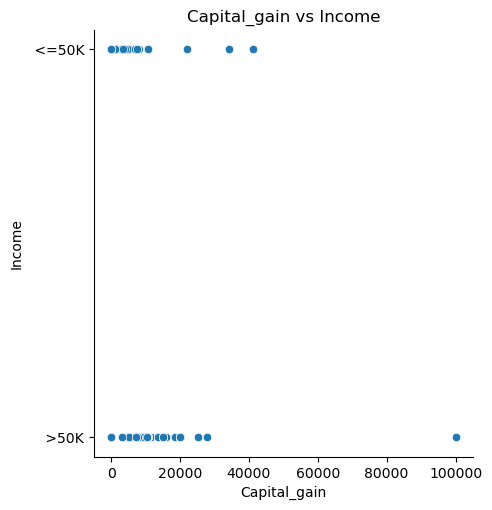

In [27]:

sns.relplot(x='Capital_gain',y='Income', data = data)
plt.title('Capital_gain vs Income')
plt.show()

The above plot show capital_gain and income and we can clearly see that people who earned more than >50k gain more capital than those who earned less than less than equal to 50k 

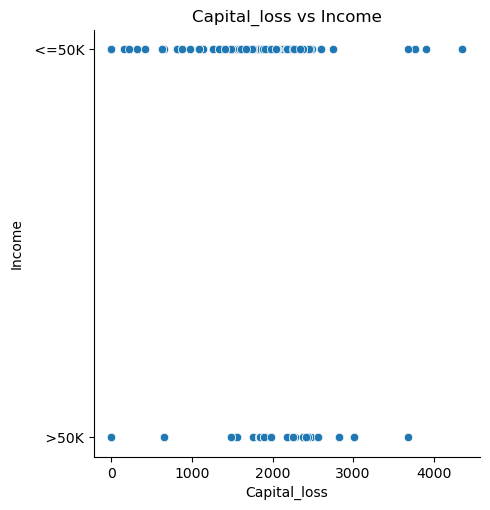

In [28]:
sns.relplot(x='Capital_loss',y='Income', data = data)
plt.title('Capital_loss vs Income')
plt.show()

The above plot shows comparism with Capital loss vs Income, which show that people who earn less than equal to 50k loss more capital than those who earn more than 50k 

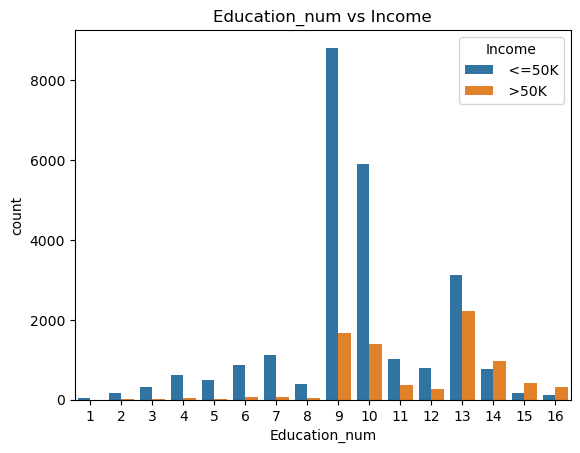

In [29]:
sns.countplot(x='Education_num',hue='Income', data = data)
plt.title('Education_num vs Income')
plt.show()

Pople with more than one eduction number can make more than 50k but still people with more education make less than 50k 

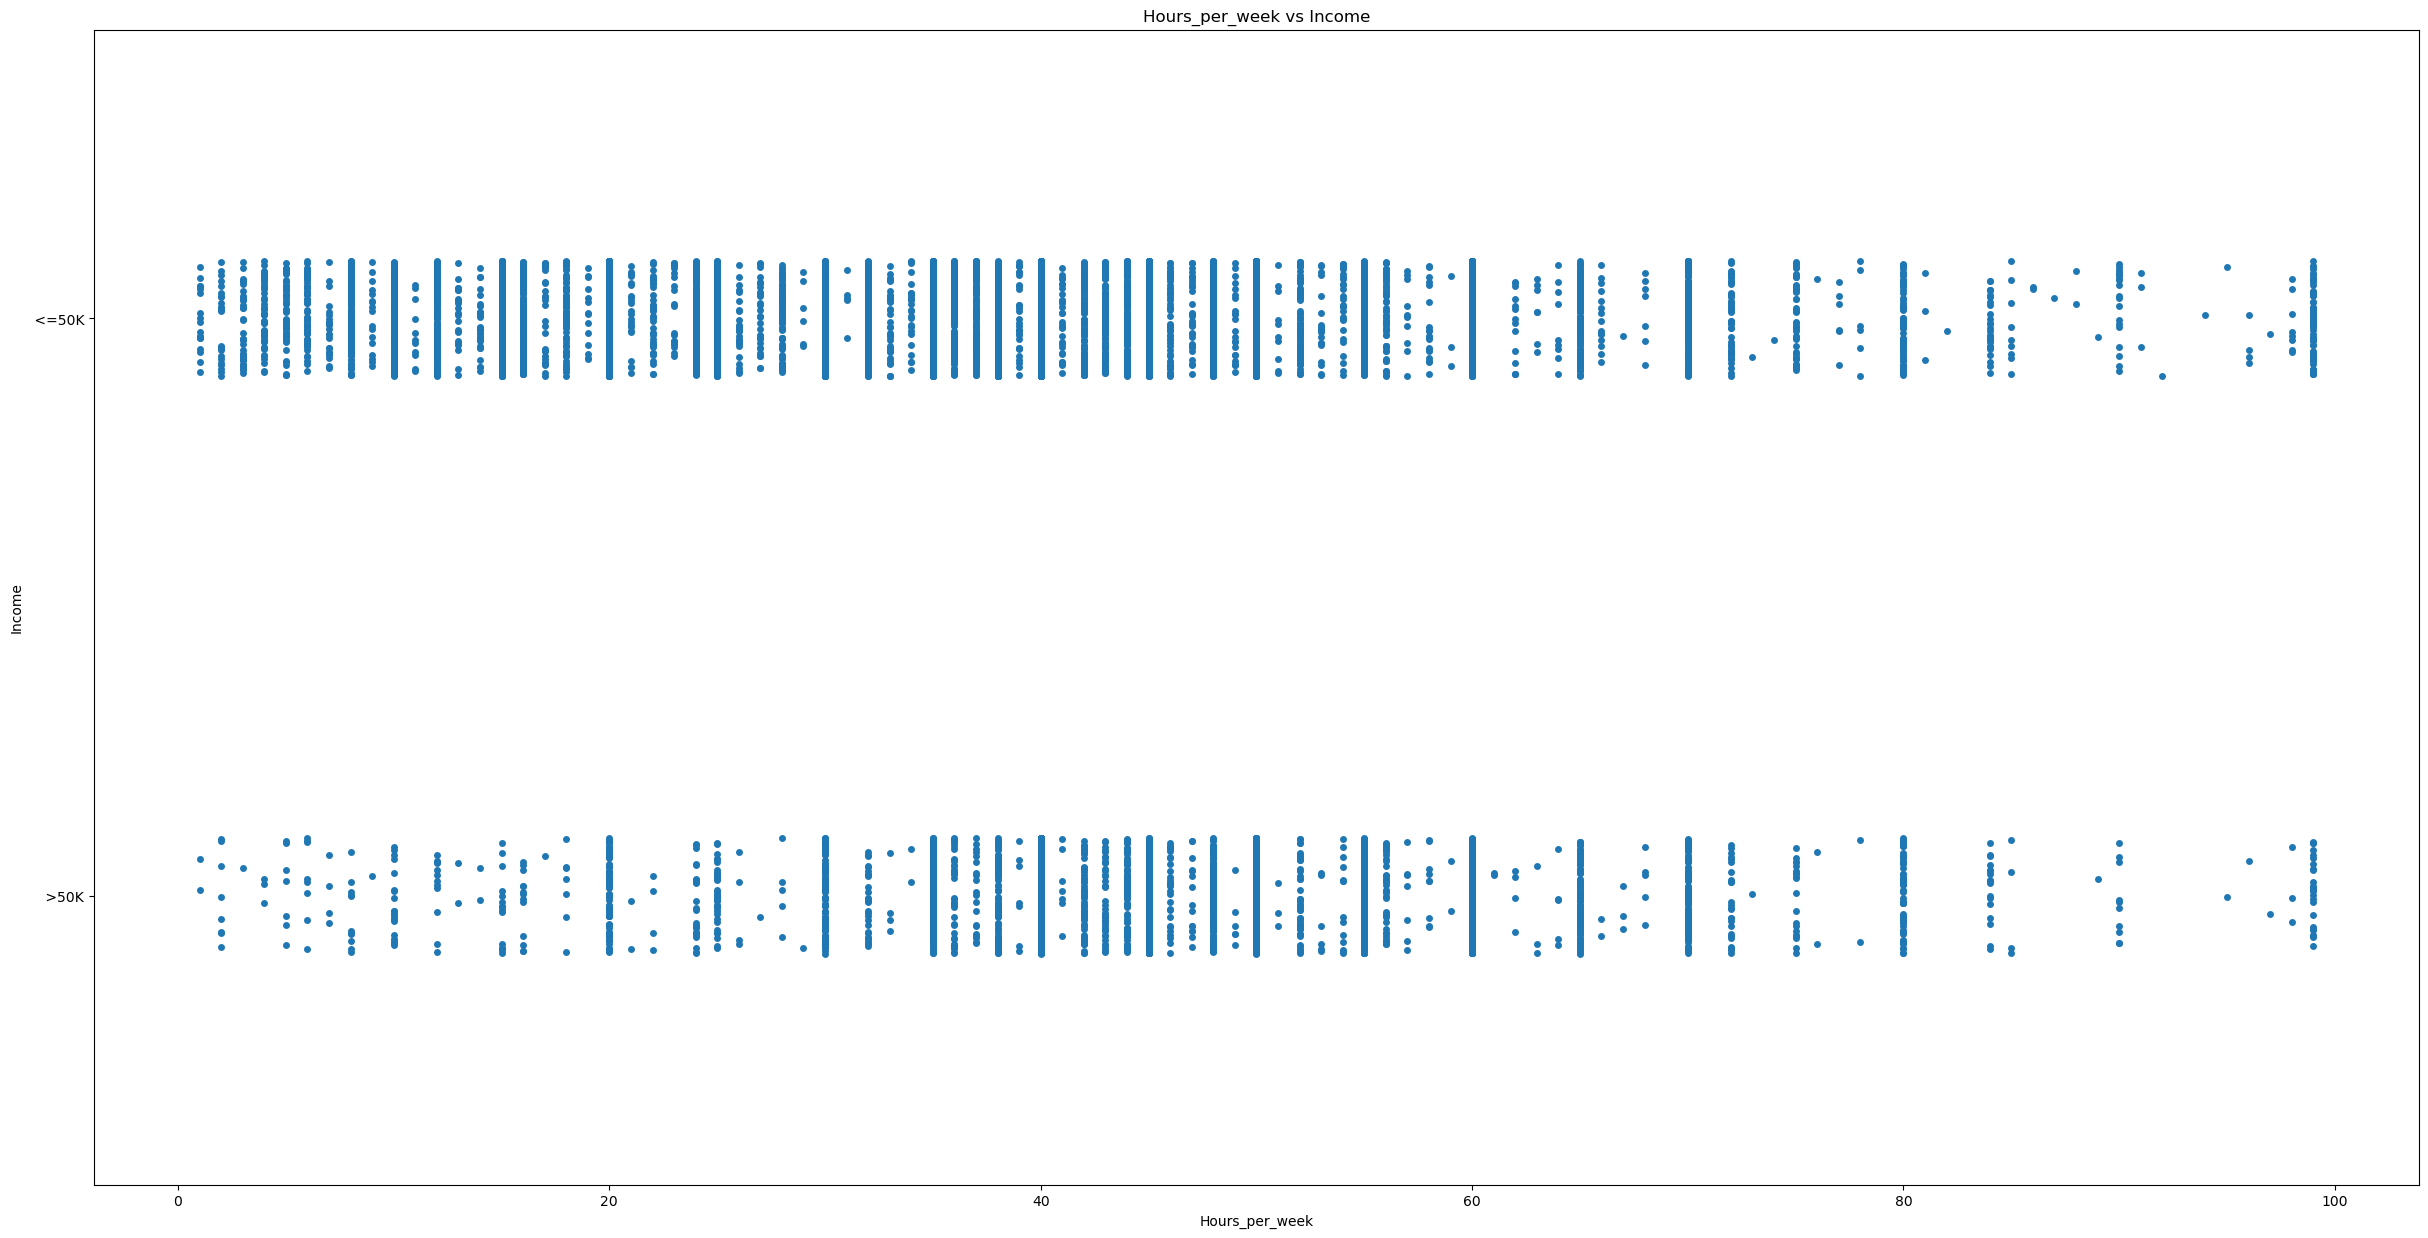

In [30]:
plt.figure(figsize=(30,15))
sns.stripplot(x='Hours_per_week',y ='Income', data = data)
plt.title('Hours_per_week vs Income')
plt.show()

The above count plot shows people who make less than equal to 50k wwork more hours more than people who work receive more than 50k. 

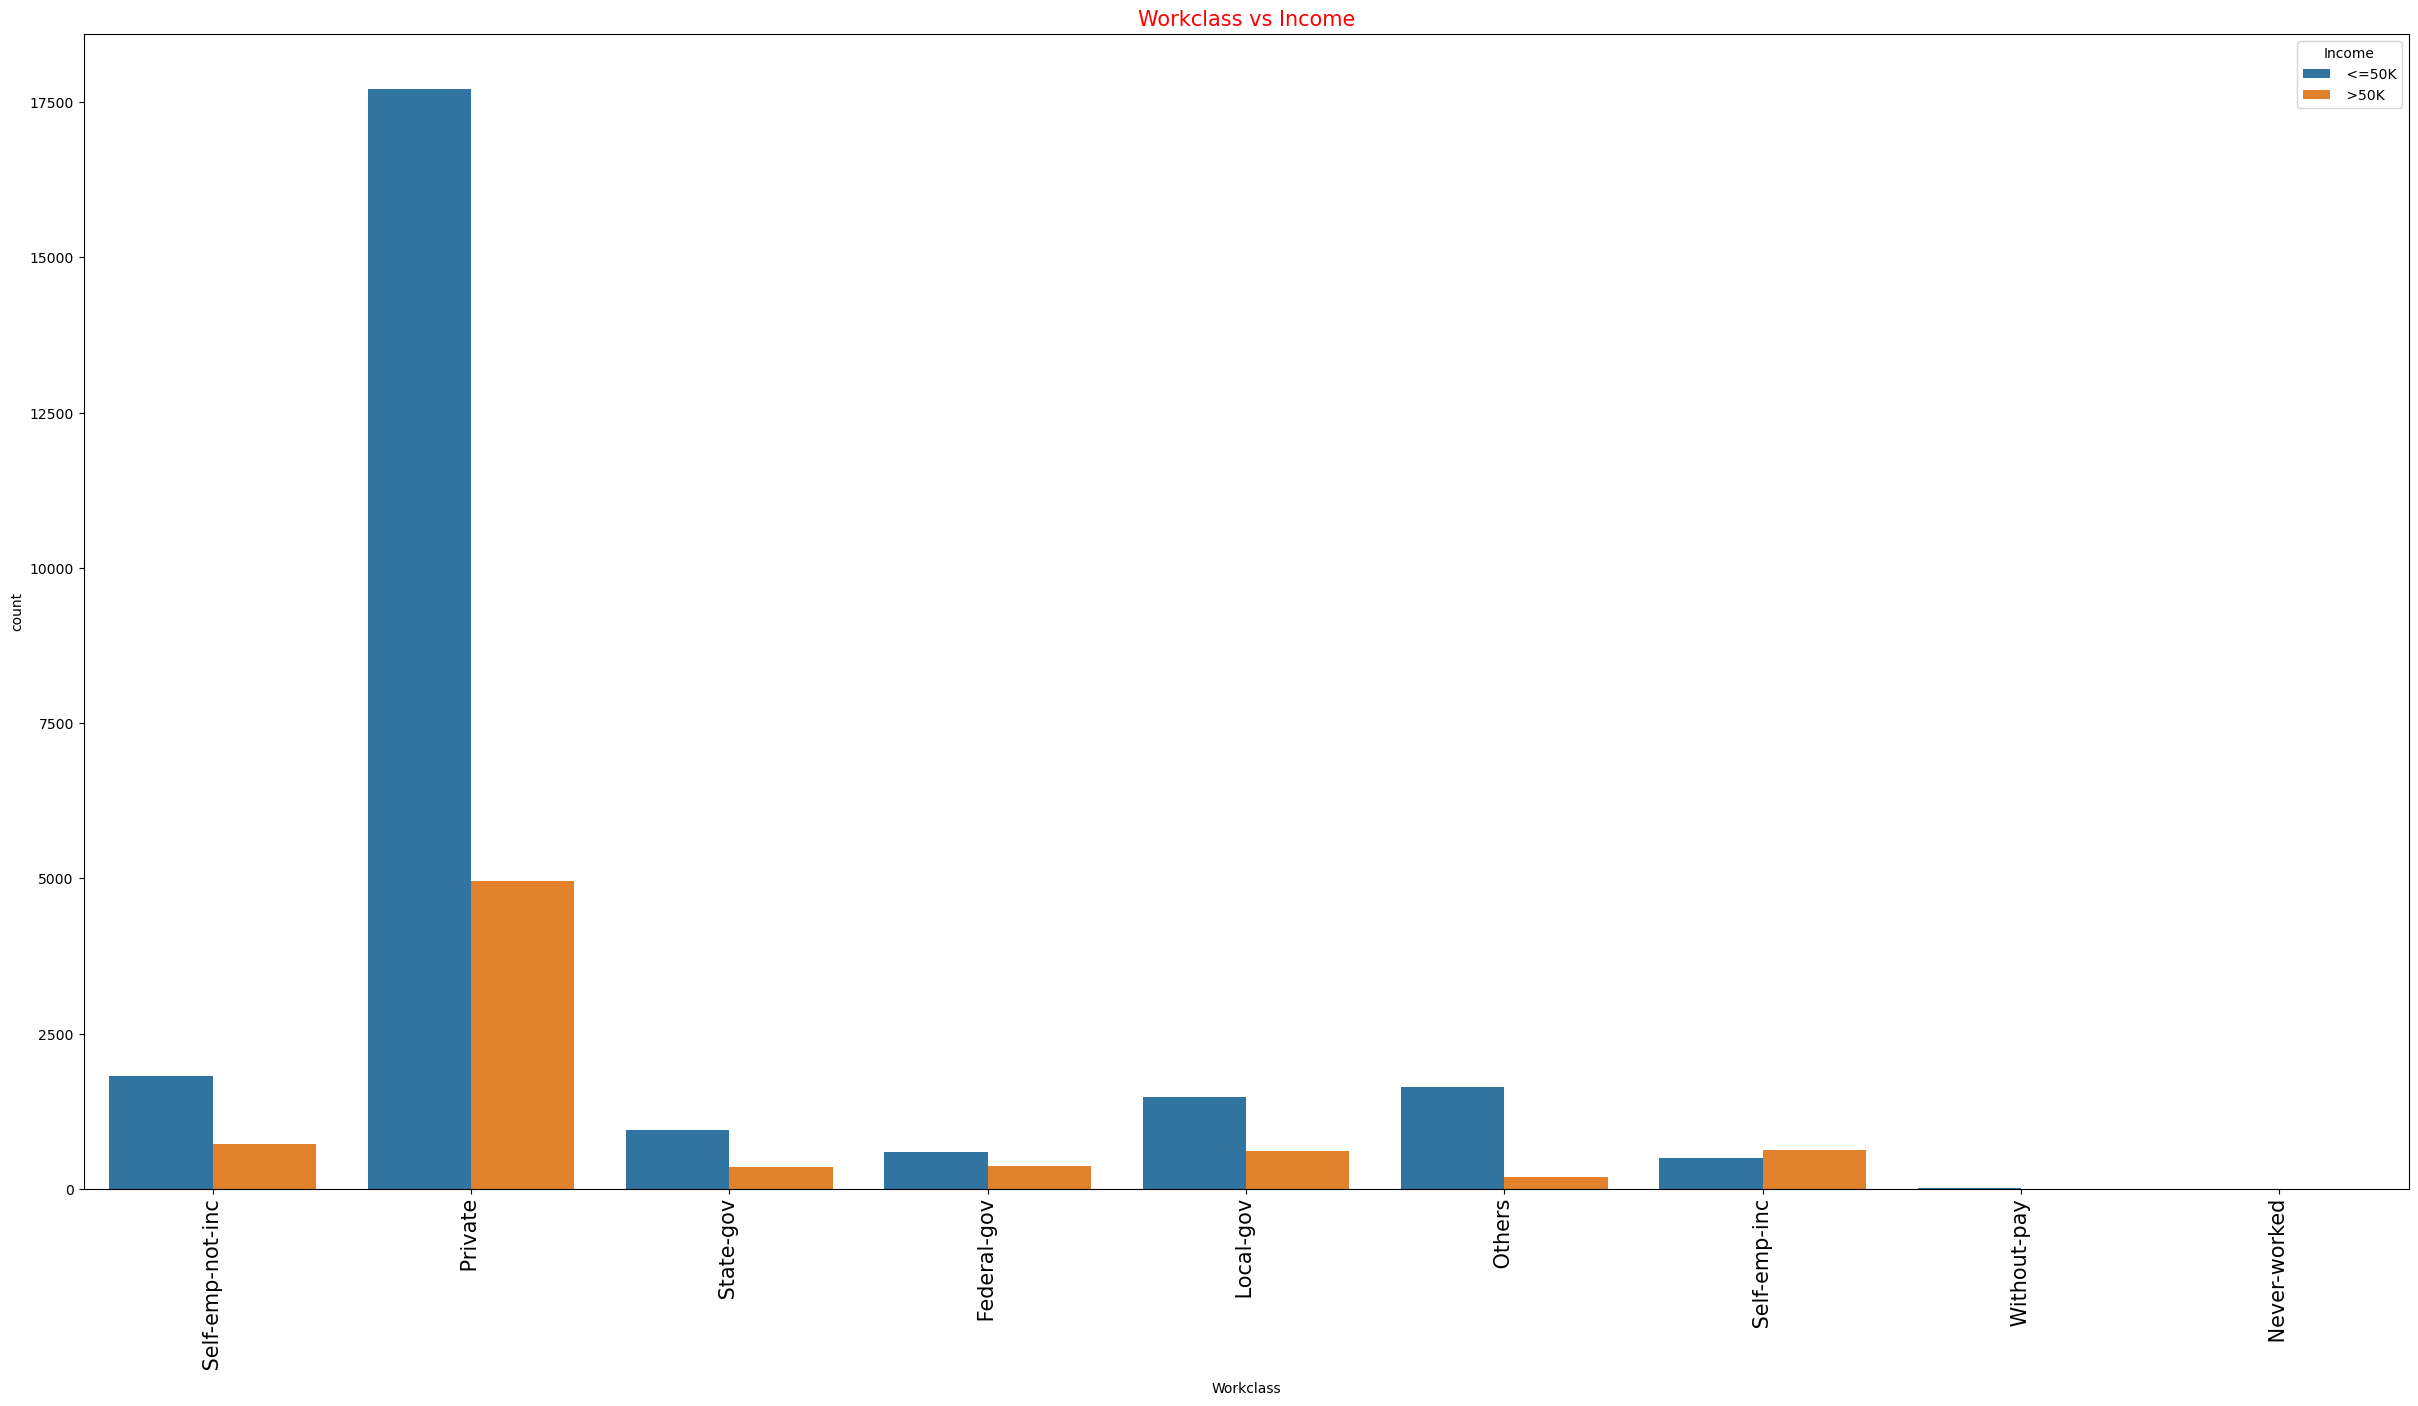

In [31]:
plt.figure(figsize=(30,15))
sns.countplot(x='Workclass', hue ='Income', data = data)
plt.xticks(rotation=90,fontsize= 15)
plt.title('Workclass vs Income', fontsize=15, color='r')
plt.show()

People who work in private have more people that received <=50 compared to people that received >50k, and there is a huge gap. Same with Self-emp-not-inc, State-gov,Federal-gov, Local-gov and self-emp-in but the difference are not much compare to private work working calss. 


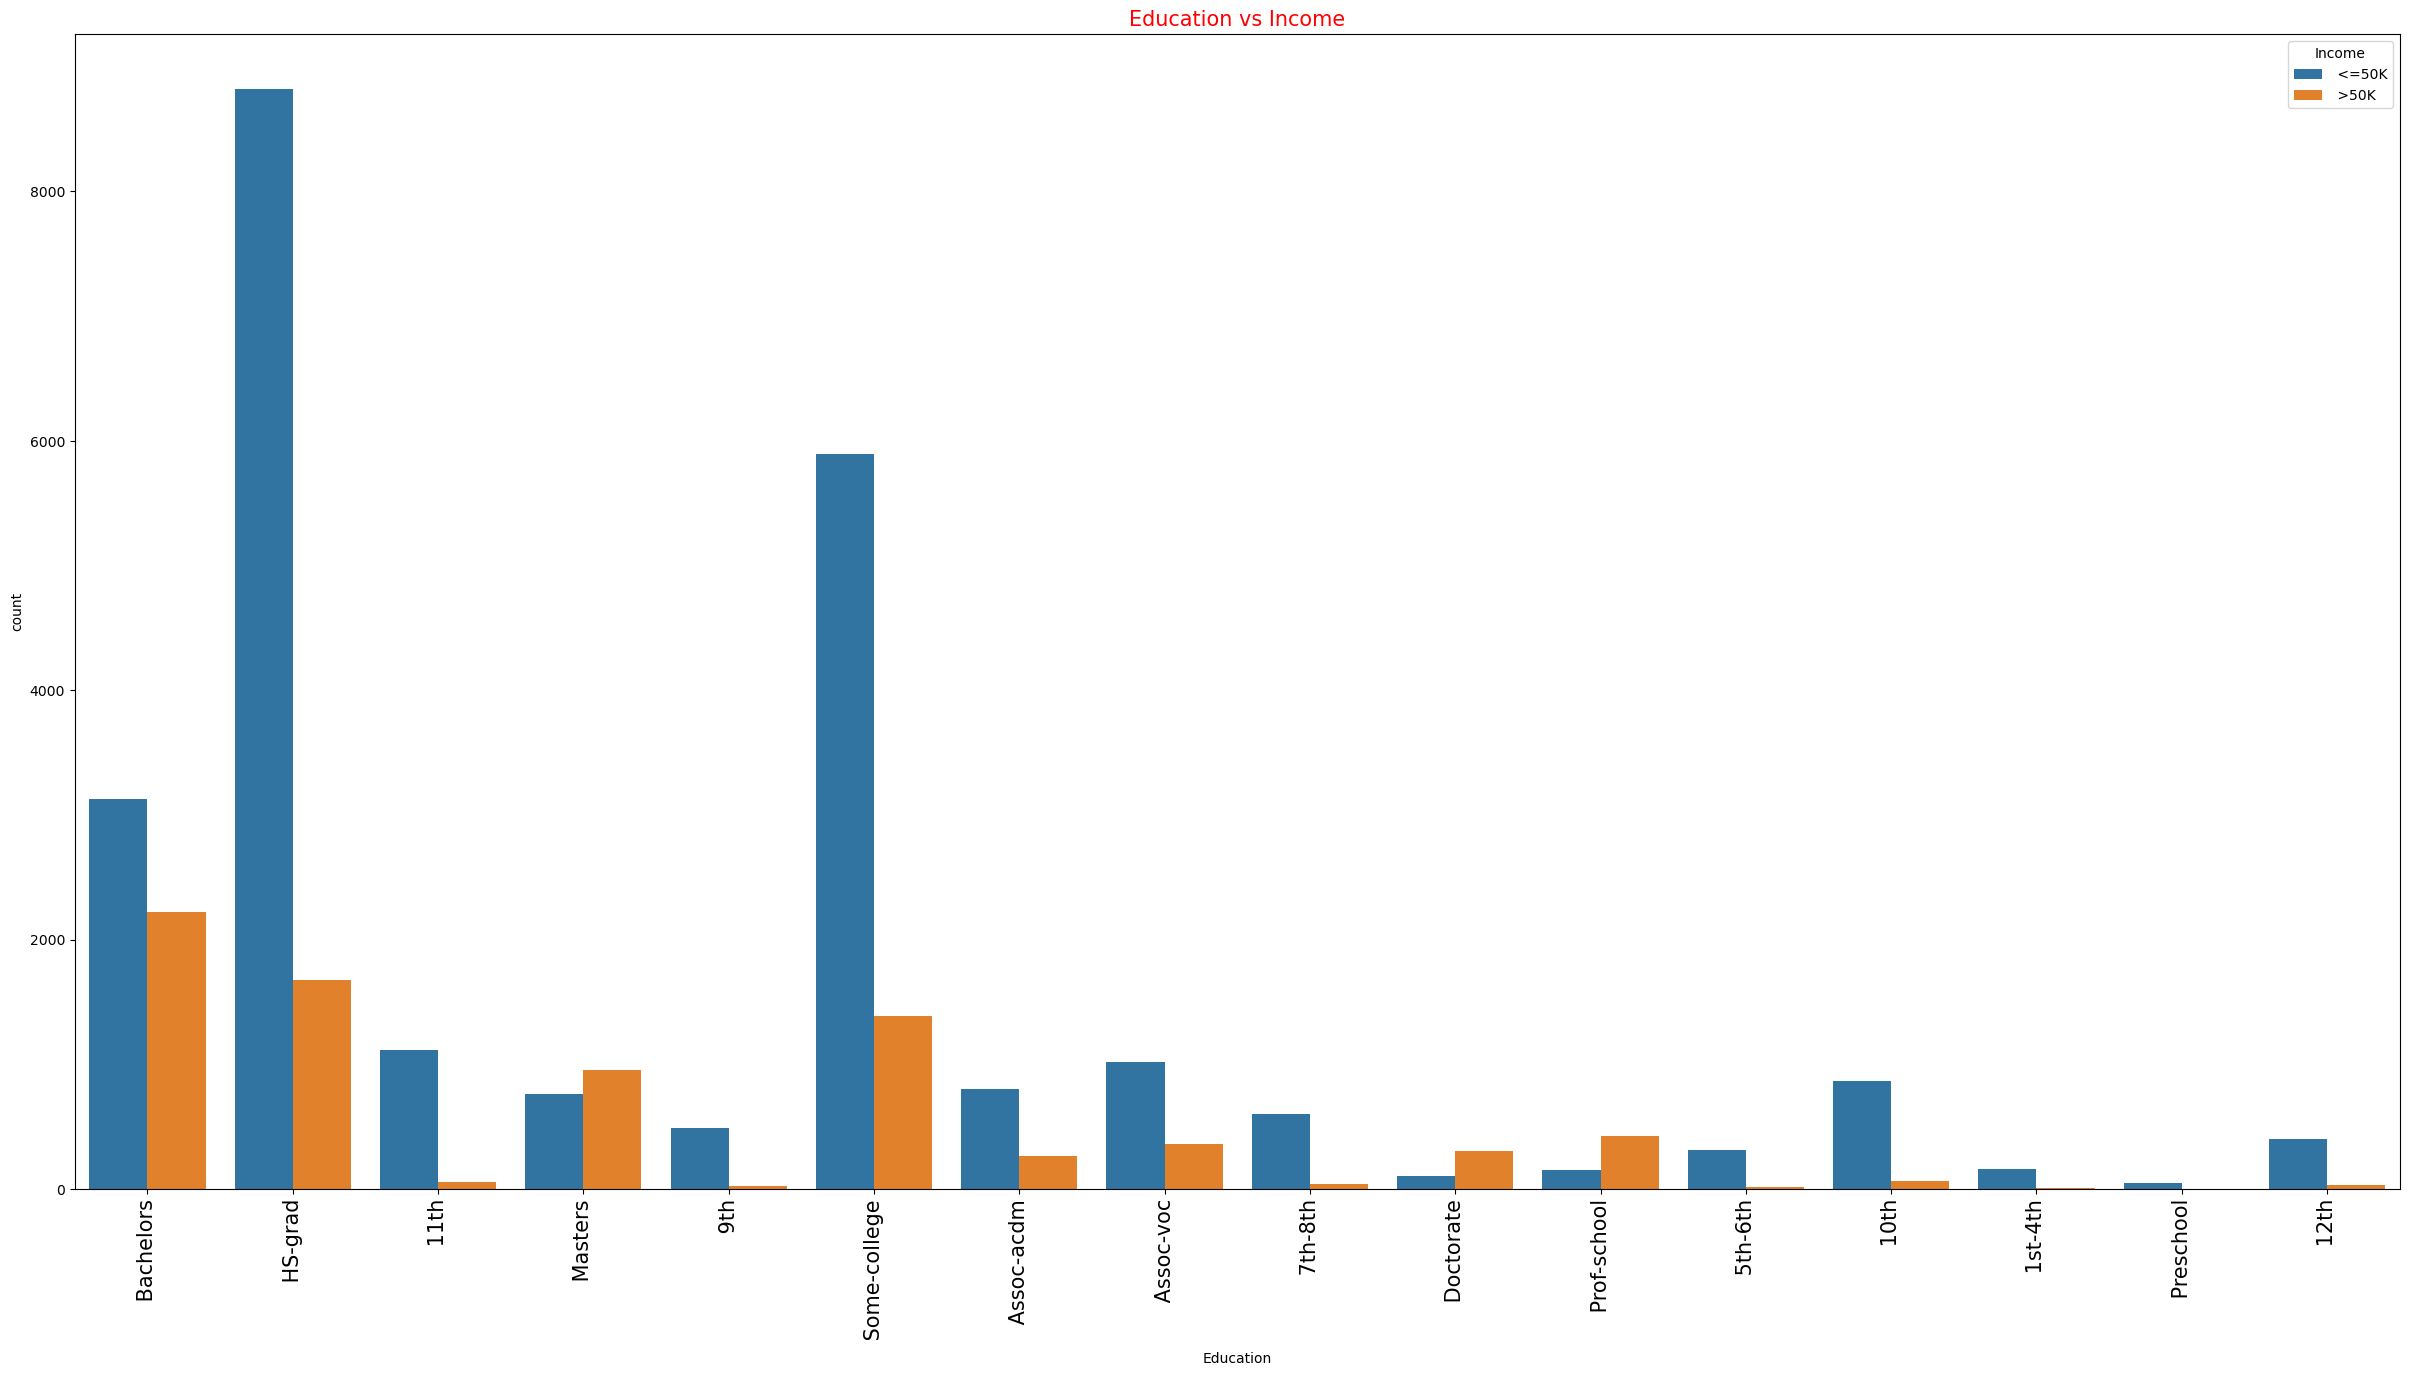

In [32]:
plt.figure(figsize=(30,15))
sns.countplot(x='Education', hue ='Income', data = data)
plt.xticks(rotation=90,fontsize= 15)
plt.title('Education vs Income', fontsize=15, color='r')
plt.show()

People with Master, Doctorate,and Prof-School majority of them make more than 50k compare to people with same degree that make less than equal to 50k. 

People with Bachelors degree make >50k but not more then people with same Bachelors degree that make less than equal to 50k. Same in HS-grade,(But in Hs-grade,11th, 10th 12th the margin is huge )  

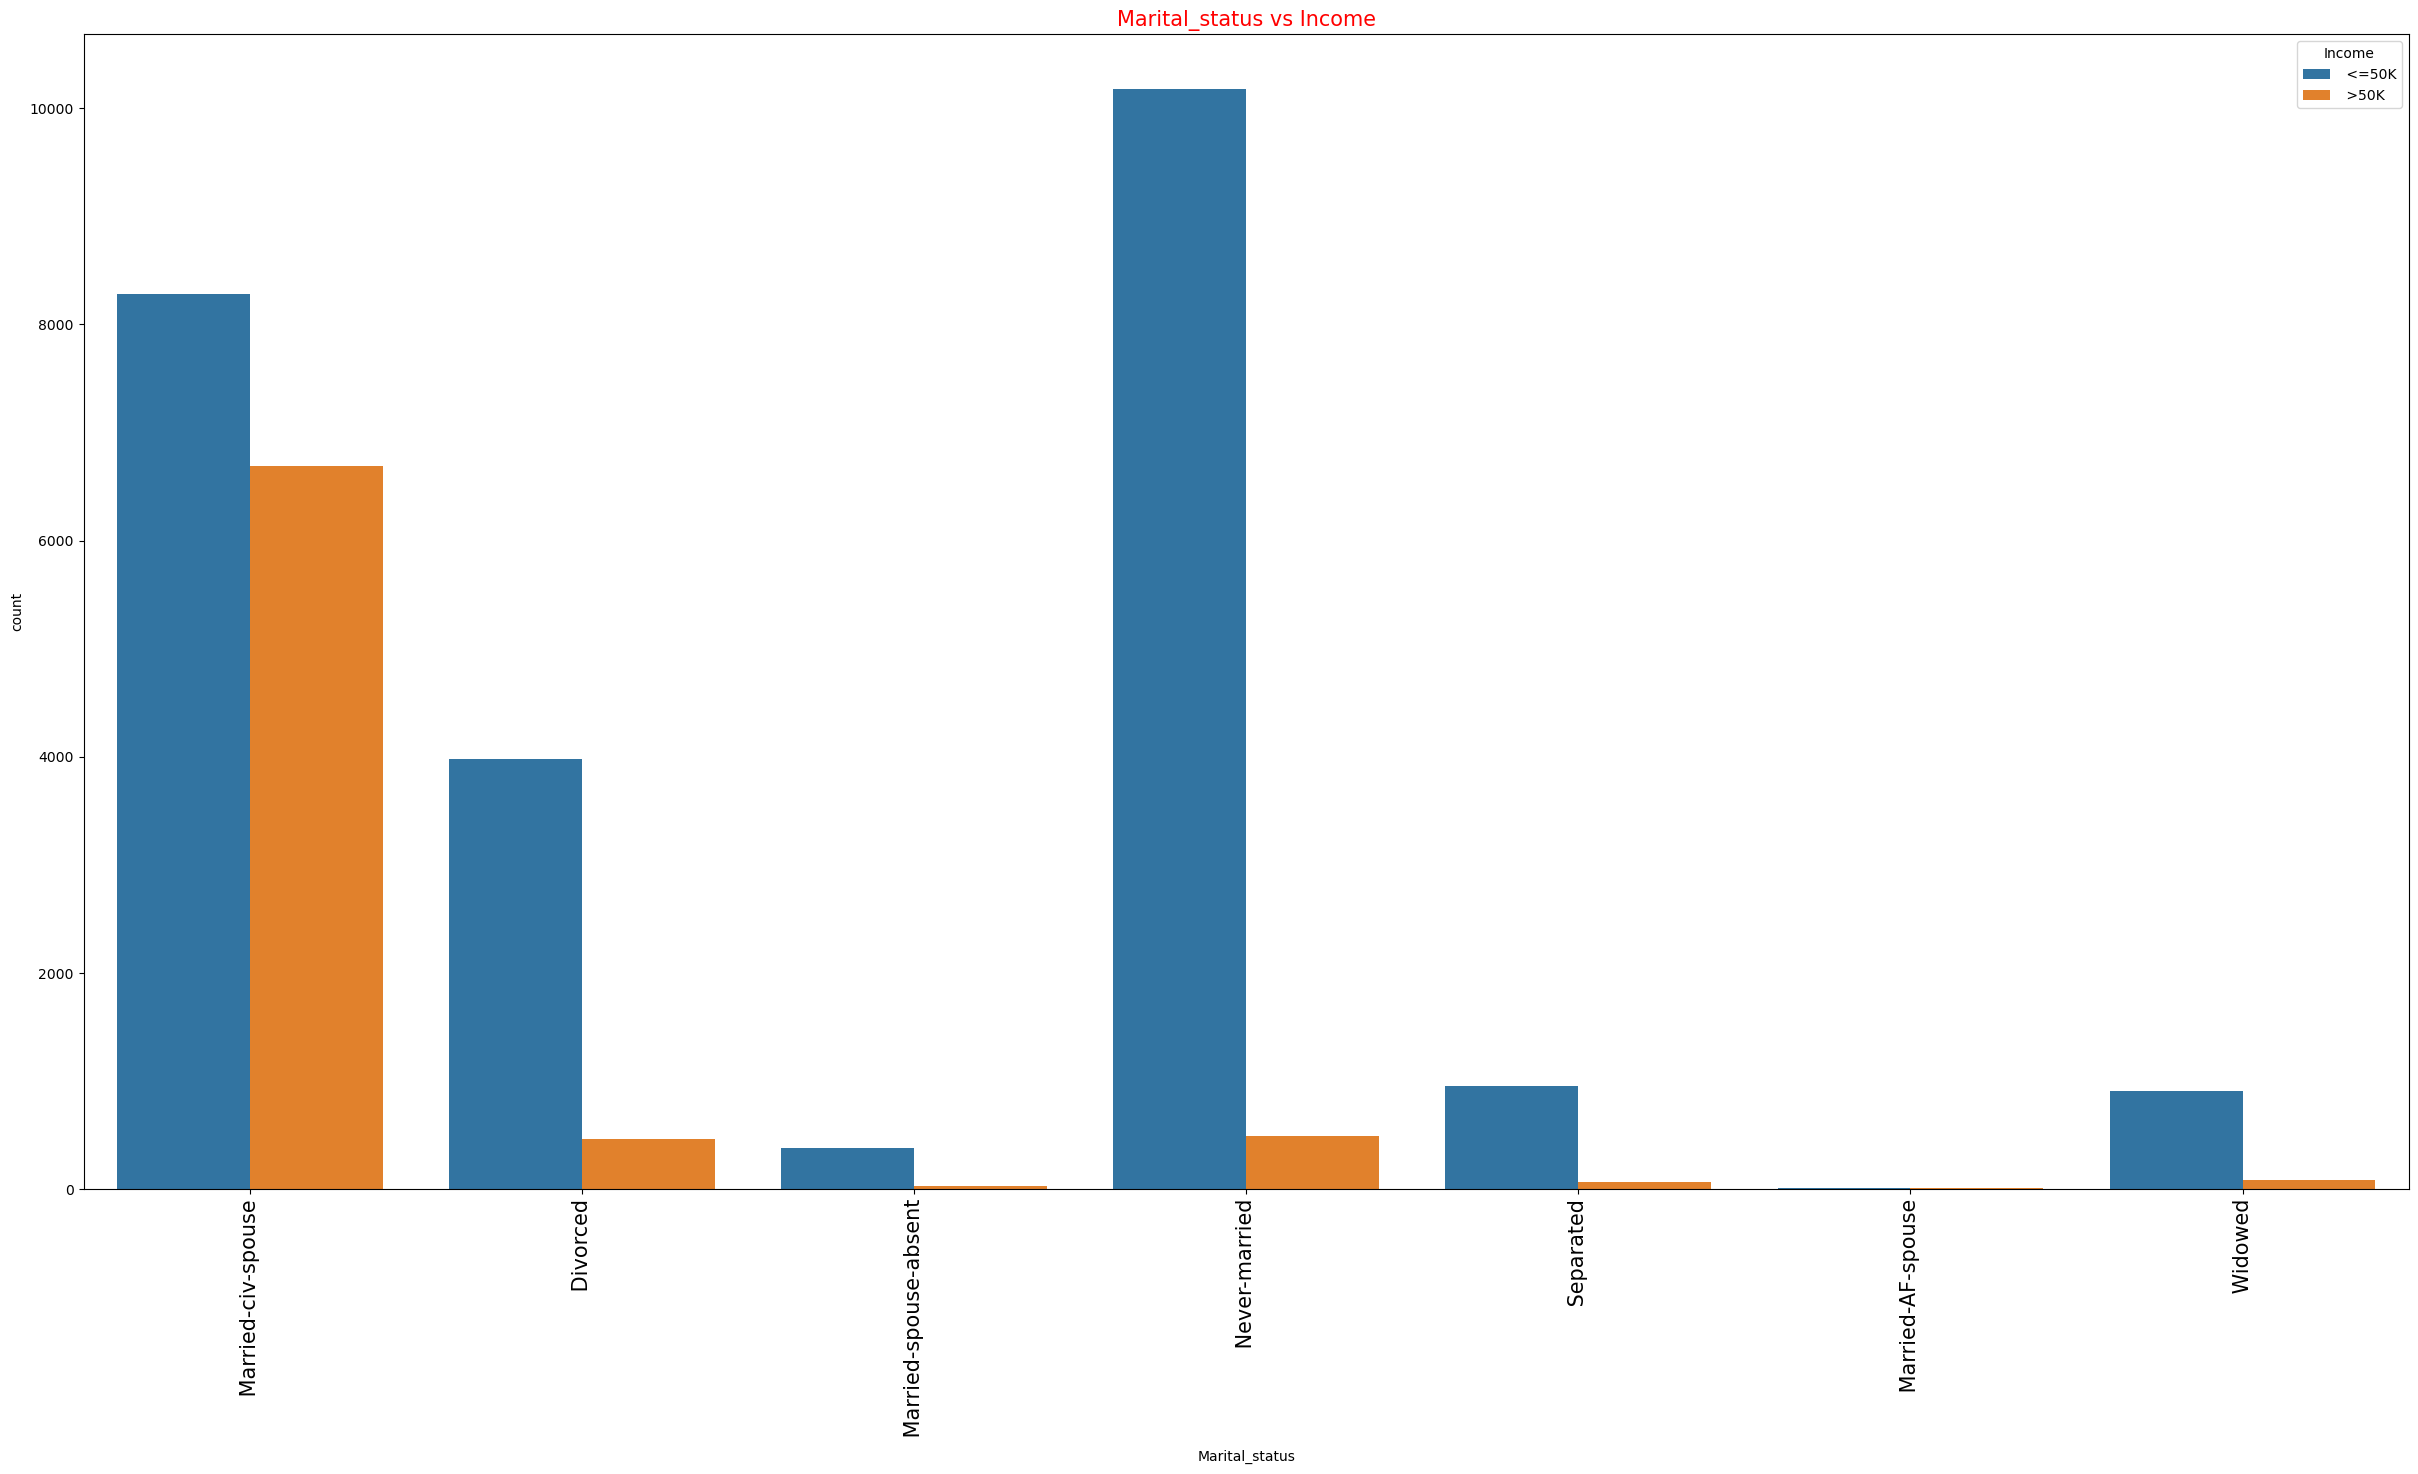

In [33]:
plt.figure(figsize=(30,15))
sns.countplot(x='Marital_status', hue ='Income', data = data)
plt.xticks(rotation=90,fontsize= 15)
plt.title('Marital_status vs Income', fontsize=15, color='r')
plt.show()

Accrding to the above count plot between marital_status and income, the plots shows that people who are married recived more than 50k compare to any marital_status class. 
while people who are never married shows that they receive less than equal 50k compare to any other marital_status. 

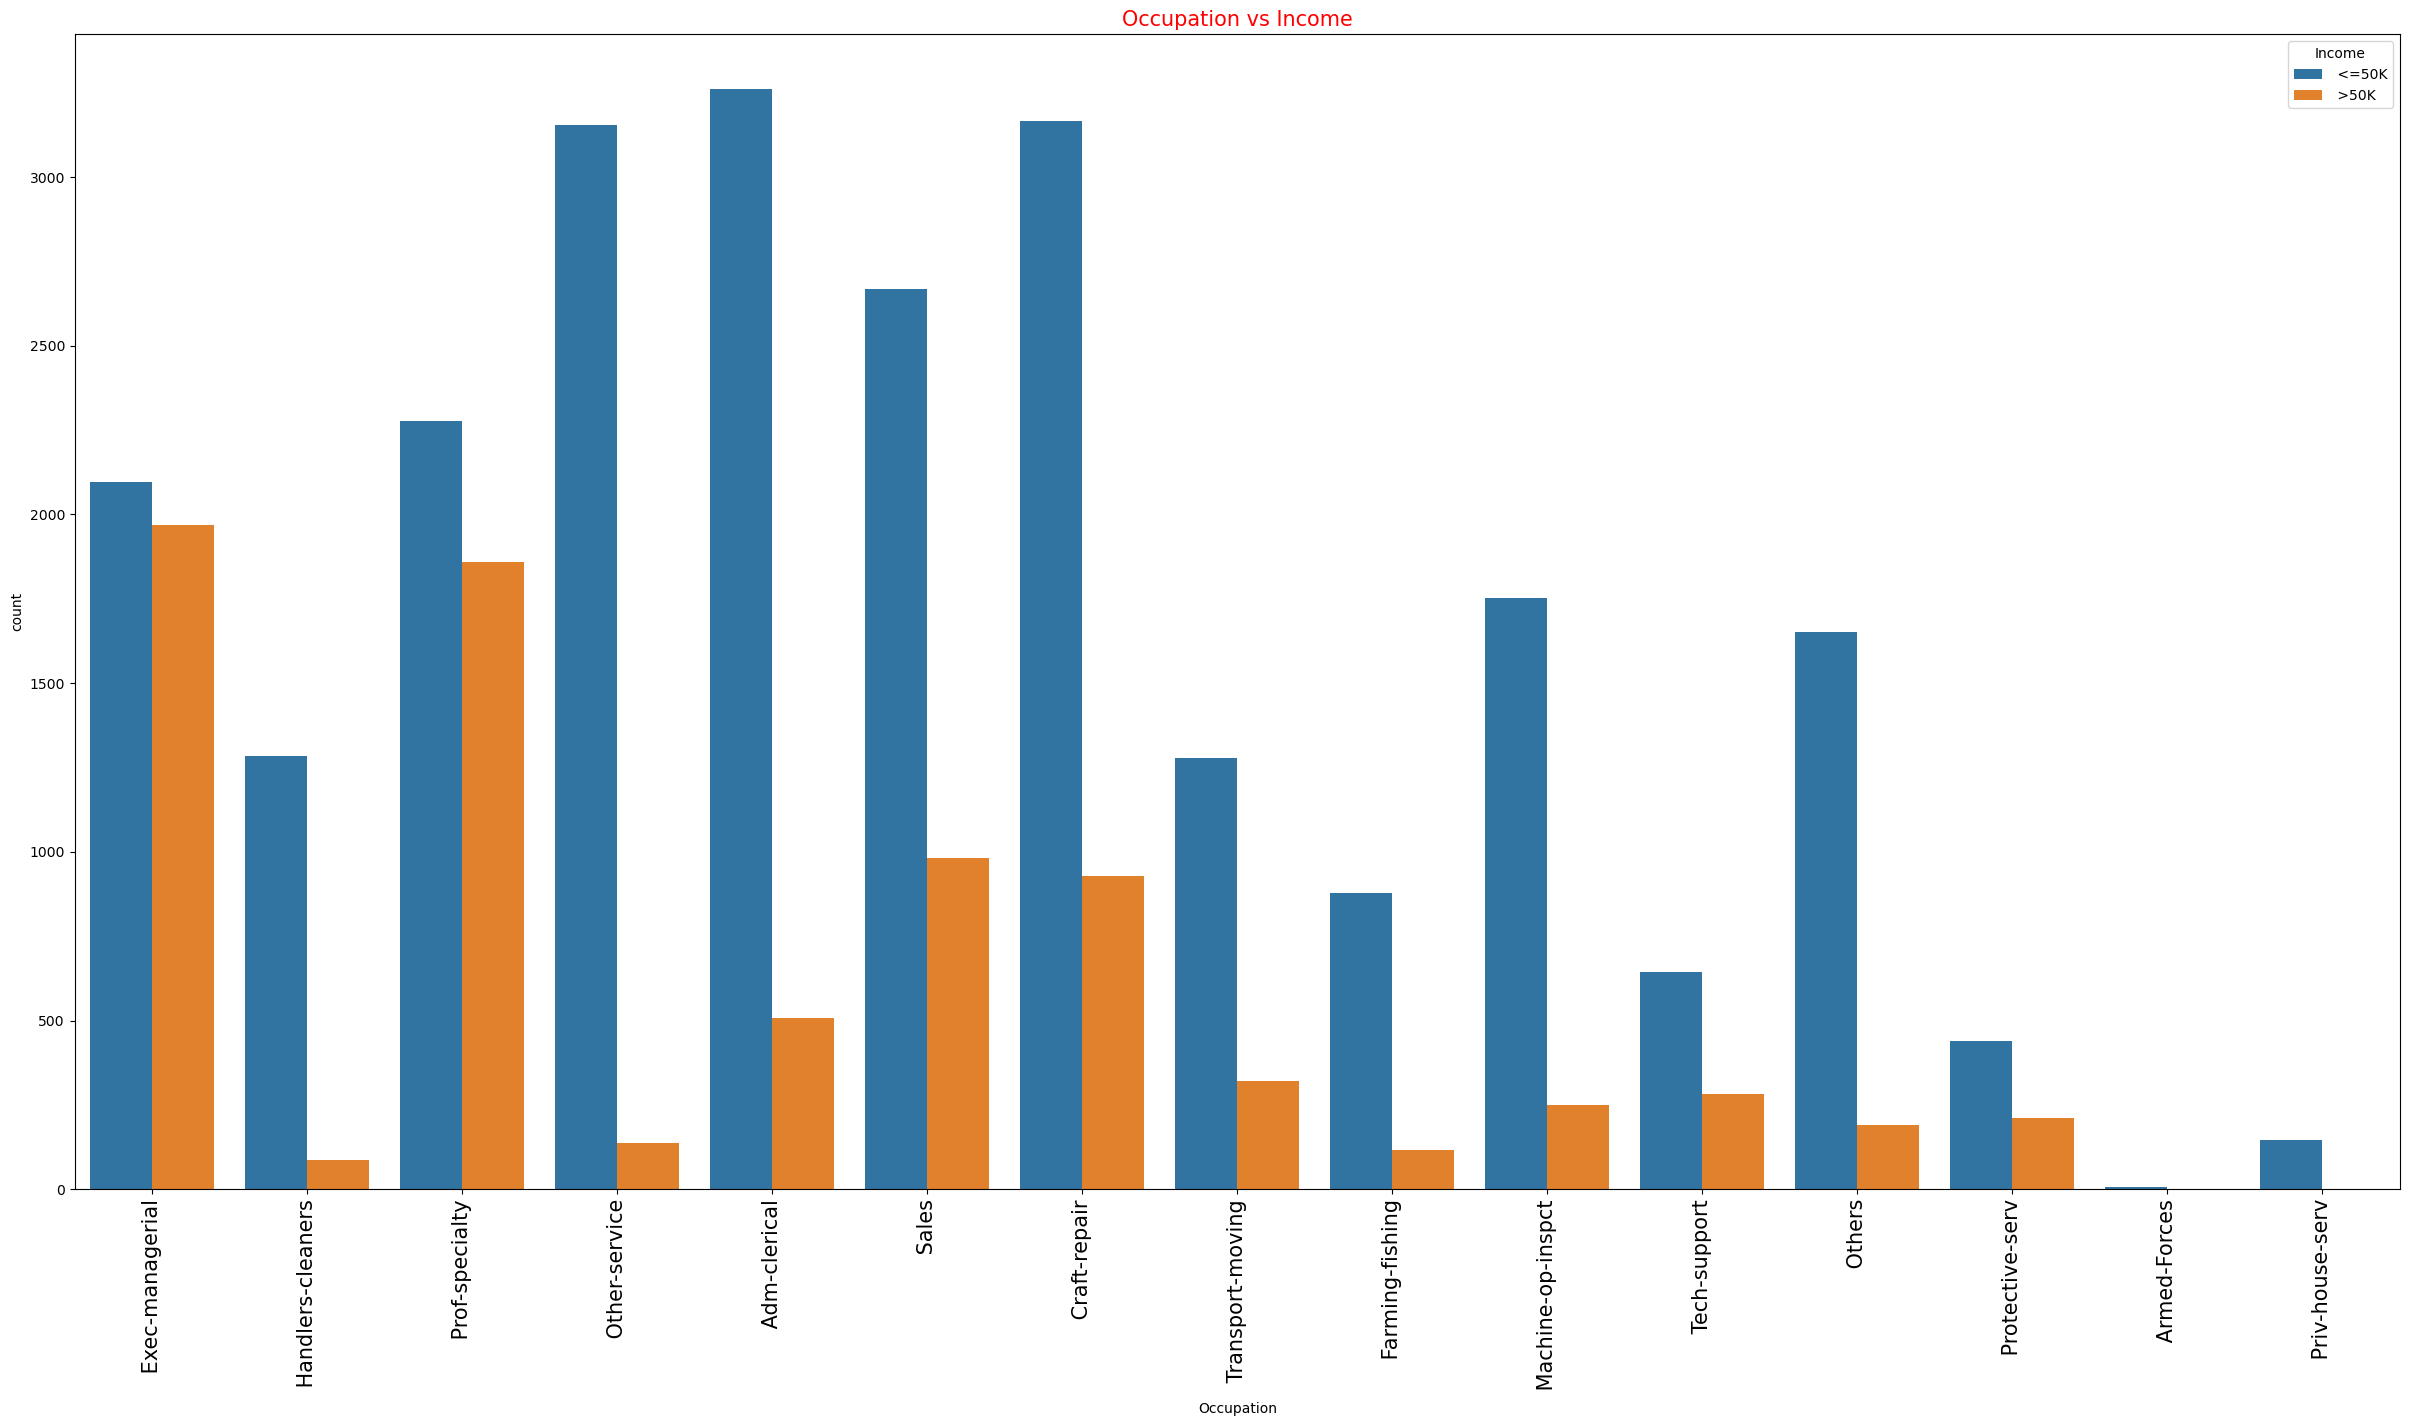

In [34]:
plt.figure(figsize=(30,15))
sns.countplot(x='Occupation', hue ='Income', data = data)
plt.xticks(rotation=90,fontsize= 15)
plt.title('Occupation vs Income', fontsize=15, color='r')
plt.show()

The above count plot shows comparism between occupation and income. According to the above plot result, we can see that Exec-managerial fellowed by prof-speciality, sales, Craft-repair etc make more than 50k. However, people in this mentioned occupation makes less than equal to 50k are much compared to those that make more than 50k 

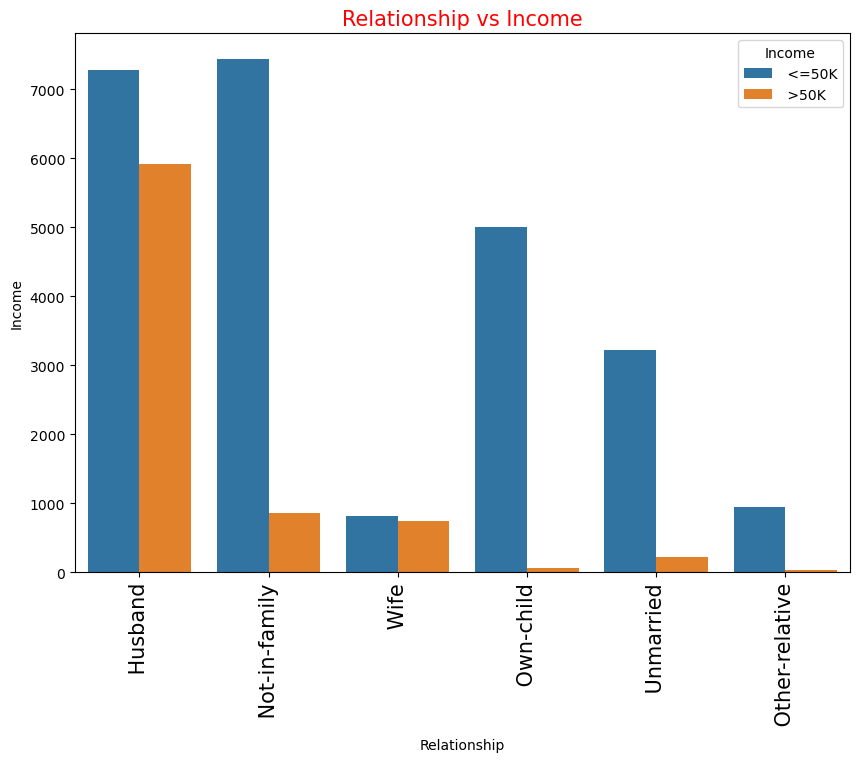

In [60]:
plt.figure(figsize=(10,7))
sns.countplot(x='Relationship', hue ='Income', data = data)
plt.xlabel('Relationship')
plt.ylabel('Income')
plt.xticks(rotation=90,fontsize= 15)
plt.title('Relationship vs Income', fontsize=15, color='r')
plt.show()

The above count plot shows how relationship affect income.According to the plot people who husbands make more than 50k compare to the Not-in-family, wife,  Unmarried, own-child and other-relative. 
As for people whose income is less than equal to 50k, Not-in-family comes first fellowed by husband, own-child, Umarried,Other-Relative and wife. 

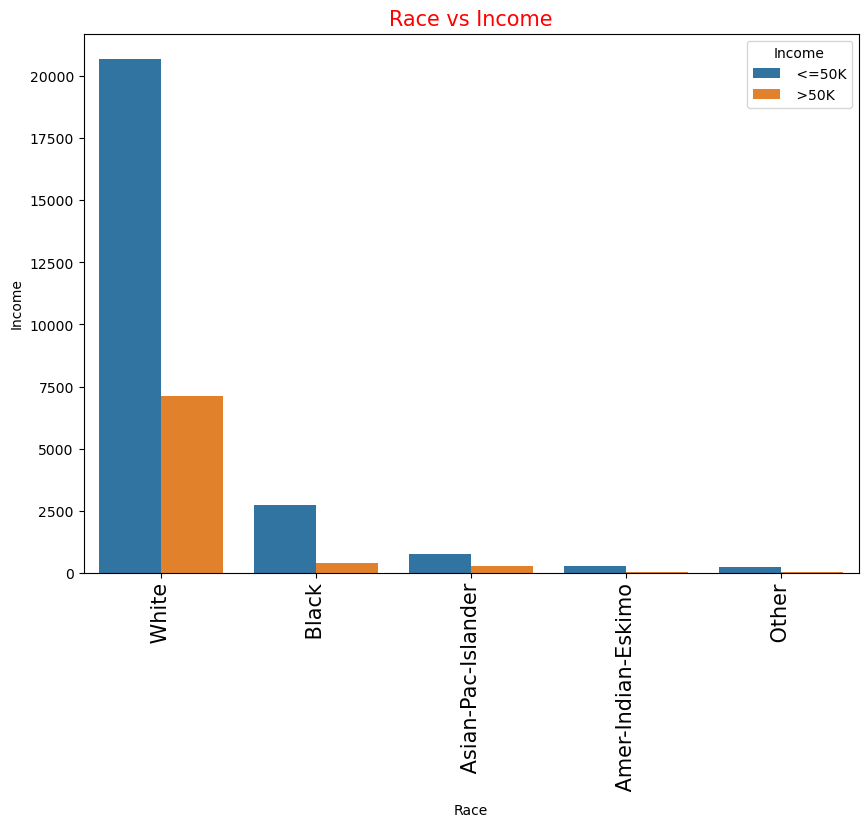

In [61]:
plt.figure(figsize=(10,7))
sns.countplot(x='Race', hue ='Income', data = data)
plt.xlabel('Race')
plt.ylabel('Income')
plt.xticks(rotation=90,fontsize= 15)
plt.title('Race vs Income', fontsize=15, color='r')
plt.show()

The above countplot show relationship between race and income. According to the plot, for people whose income is less than equal to 50k we can see that white race comes first fellowed by black, Asian-Pac-Islander, Amer-Indian-Eskimo amd other. 
Same for Race whose income is more than 50k. 

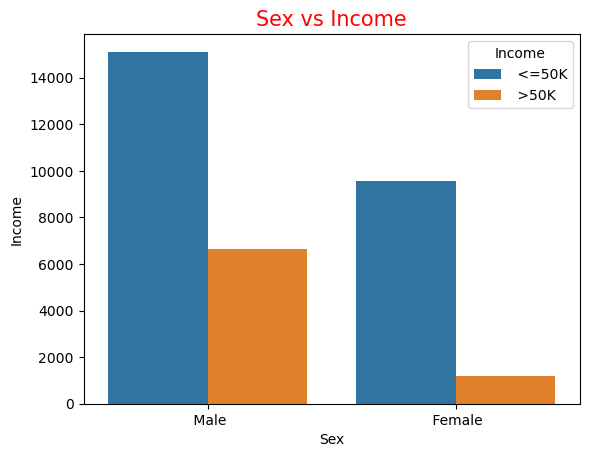

In [62]:
sns.countplot(x='Sex', hue ='Income', data = data)
plt.xlabel('Sex')
plt.ylabel('Income')
plt.title('Sex vs Income', fontsize=15, color='r')
plt.show()

Male has more people whose income is more than 50k and also whose income is less than equal 50k than female. 

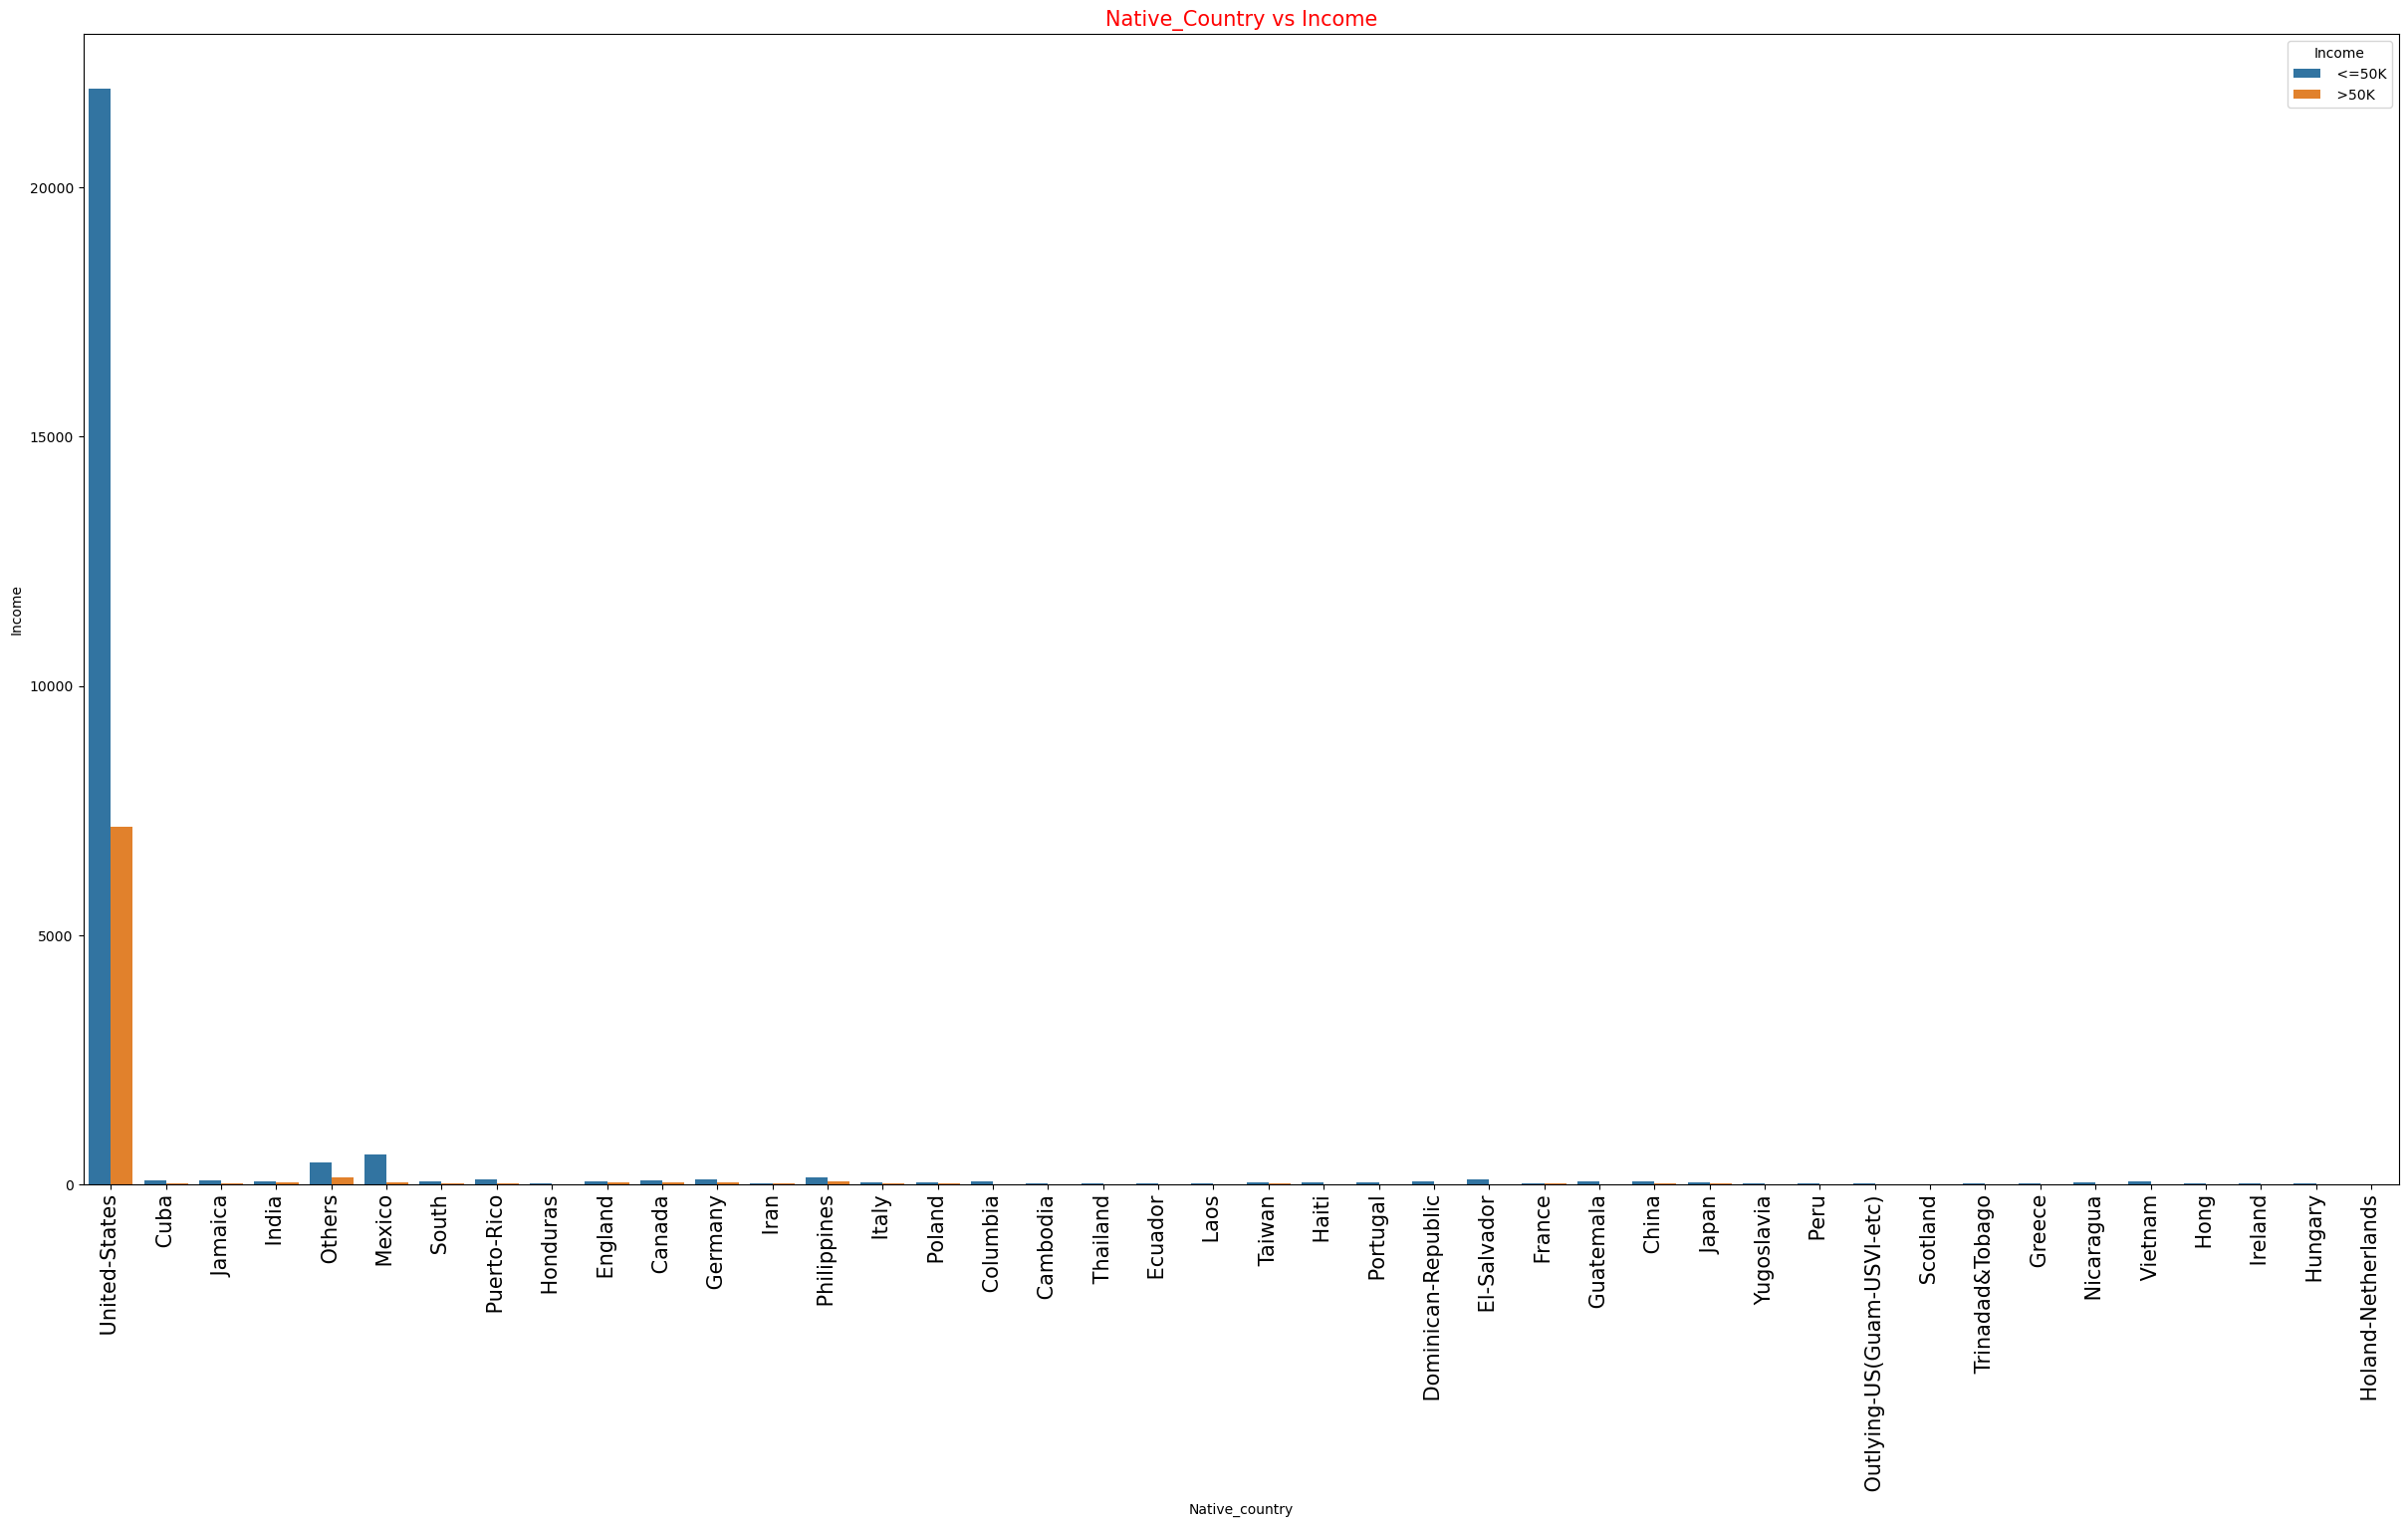

In [67]:
plt.figure(figsize=(30,15))
sns.countplot(x='Native_country', hue ='Income', data = data)
plt.xlabel('Native_country')
plt.ylabel('Income')
plt.xticks(rotation=90,fontsize= 15)
plt.title('Native_Country vs Income', fontsize=15, color='r')
plt.show()

The above count plot shows Relationshp beween Native_Country vs Income. According to the result united states has more people with less than equal to 50k and more than 50k fellowed by mexico and others etc. 

# MultiVariate Analysis. 

<Figure size 3000x1500 with 0 Axes>

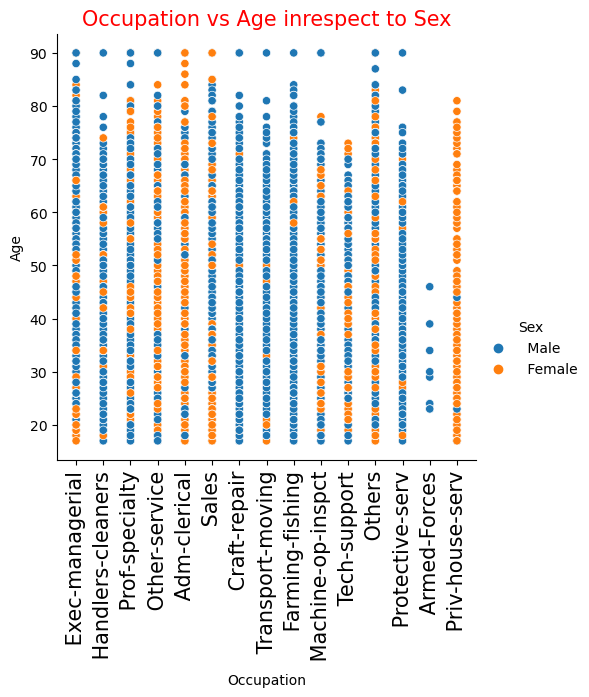

In [73]:
plt.figure(figsize=(30,15))
sns.relplot(x="Occupation", y="Age", hue="Sex", data = data)
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.xticks(rotation=90,fontsize= 15)
plt.title('Occupation vs Age inrespect to Sex', fontsize=15, color='r')
plt.show()

We have more females at age 18+ in Priv-house service, Admin-Clerical compare to males. 

Why in Exec-managerial, protective-service, craft-repair, farming-fishing, transport-moving at age 18+ we have more males than females. 

<Figure size 640x480 with 0 Axes>

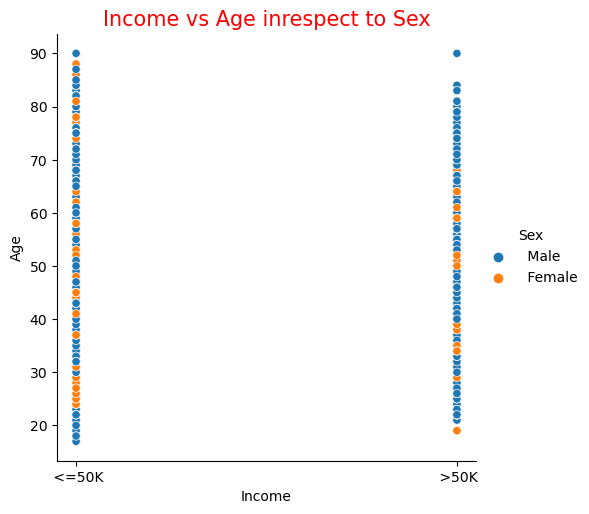

In [37]:
plt.figure()
sns.relplot(x="Income", y="Age", hue="Sex", data = data)
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Income vs Age inrespect to Sex', fontsize=15, color='r')
plt.show()

We have more male more than the female at 20+ whose income are more than 50k. while at 18+ we have more male and female whose income are less than equal to 50k

<Figure size 3000x1500 with 0 Axes>

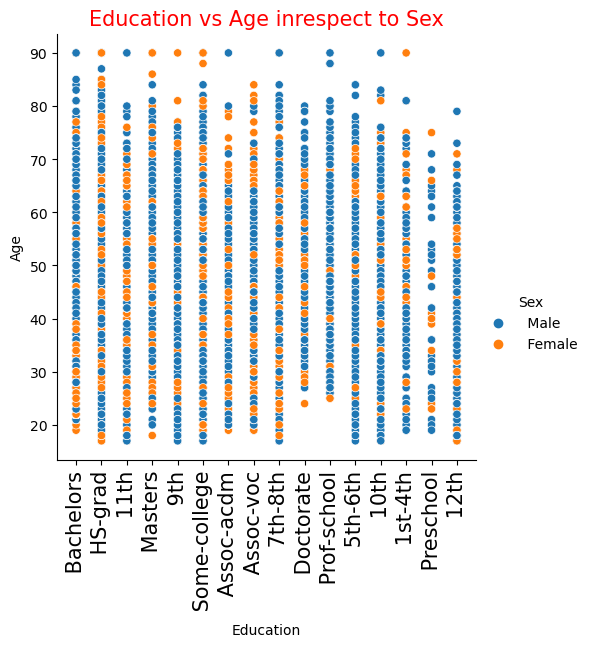

In [38]:
plt.figure(figsize=(30,15))
sns.relplot(x="Education", y="Age", hue="Sex", data = data)
plt.xlabel('Education')
plt.ylabel('Age')
plt.xticks(rotation=90,fontsize= 15)
plt.title('Education vs Age inrespect to Sex', fontsize=15, color='r')
plt.show()

The above plot shows that we have more males in all education categories than female 

<Figure size 3000x1500 with 0 Axes>

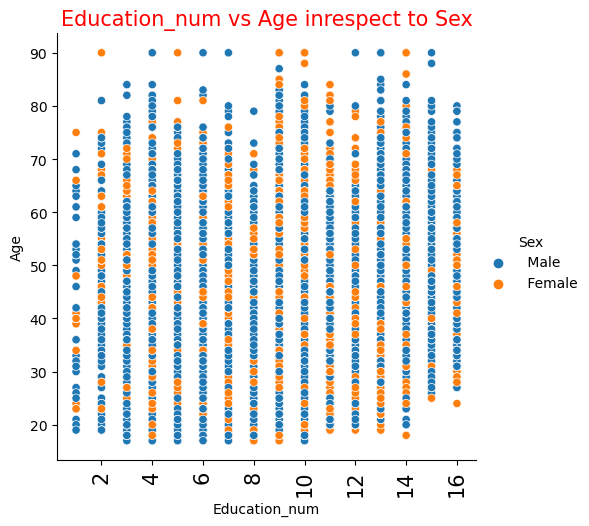

In [40]:
plt.figure(figsize=(30,15))
sns.relplot(x="Education_num", y="Age", hue="Sex", data = data)
plt.xlabel('Education_num')
plt.ylabel('Age')
plt.xticks(rotation=90,fontsize= 15)
plt.title('Education_num vs Age inrespect to Sex', fontsize=15, color='r')
plt.show()

Male in all age group have higher education number than female. 

<Figure size 3000x1500 with 0 Axes>

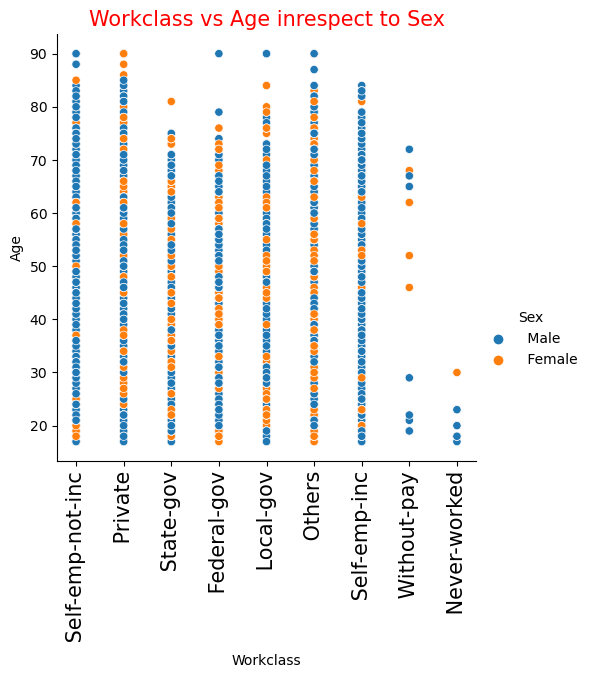

In [42]:
plt.figure(figsize=(30,15))
sns.relplot(x="Workclass", y="Age", hue="Sex", data = data)
plt.xlabel('Workclass')
plt.ylabel('Age')
plt.xticks(rotation=90,fontsize= 15)
plt.title('Workclass vs Age inrespect to Sex', fontsize=15, color='r')
plt.show()


The plots show us that males are more than the females in all work categories. 

<Figure size 3000x1500 with 0 Axes>

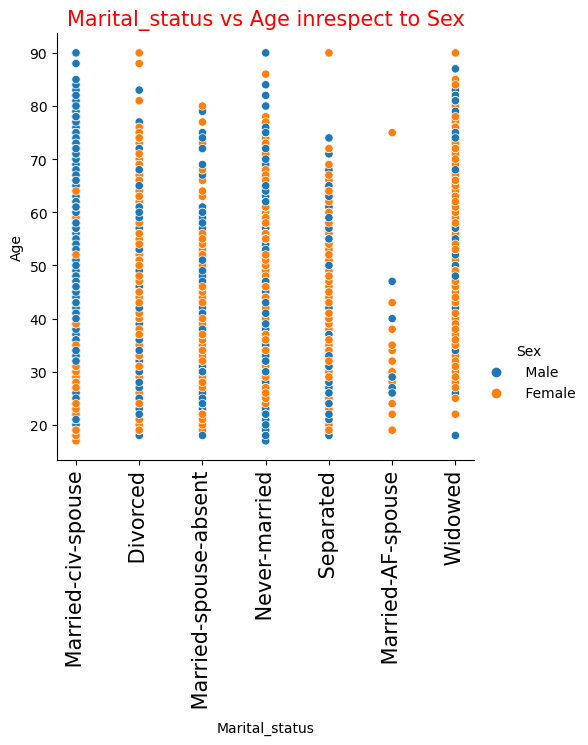

In [44]:
plt.figure(figsize=(30,15))
sns.relplot(x="Marital_status", y="Age", hue="Sex", data = data)
plt.xlabel('Marital_status')
plt.ylabel('Age')
plt.xticks(rotation=90,fontsize= 15)
plt.title('Marital_status vs Age inrespect to Sex', fontsize=15, color='r')
plt.show()

The above plot show that Married to civilian spouse has more male than fenales, while Separated and Widowed females are more than males

<Figure size 3000x1500 with 0 Axes>

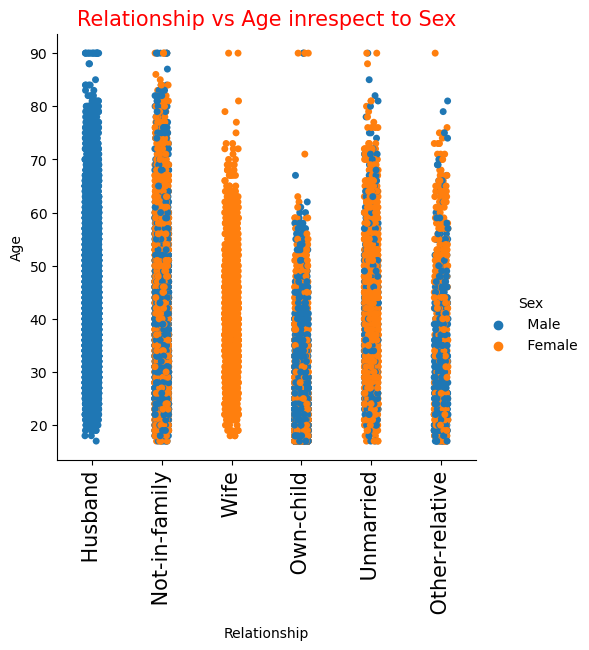

In [46]:
plt.figure(figsize=(30,15))
sns.catplot(x="Relationship", y="Age", hue="Sex", data = data)
plt.xlabel('Relationship')
plt.ylabel('Age')
plt.xticks(rotation=90,fontsize= 15)
plt.title('Relationship vs Age inrespect to Sex', fontsize=15, color='r')
plt.show()

The above plot shows the relatipnship status vs Age inspect to sex. According to the plot we have more females at age 18+ who are Not-in-family than the males. Also, we have more of males at 18+ who own-child than females. As for Unmarried we have more of females than male 

<Figure size 3000x1500 with 0 Axes>

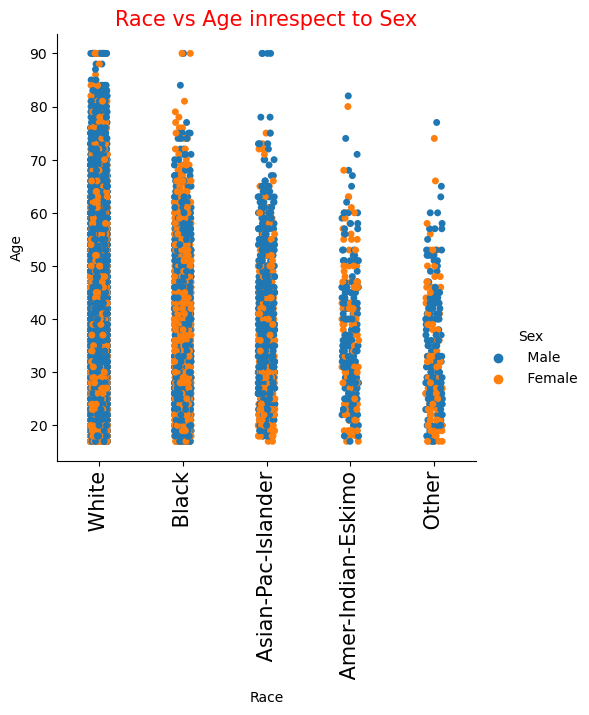

In [47]:
plt.figure(figsize=(30,15))
sns.catplot(x="Race", y="Age", hue="Sex", data = data)
plt.xlabel('Race')
plt.ylabel('Age')
plt.xticks(rotation=90,fontsize= 15)
plt.title('Race vs Age inrespect to Sex', fontsize=15, color='r')
plt.show()

The above plot shows relationship of Race vs Age inspect to sex. As we can see we have more of males at 18+ in all race than females. 

# Scatter Matrix Plot 

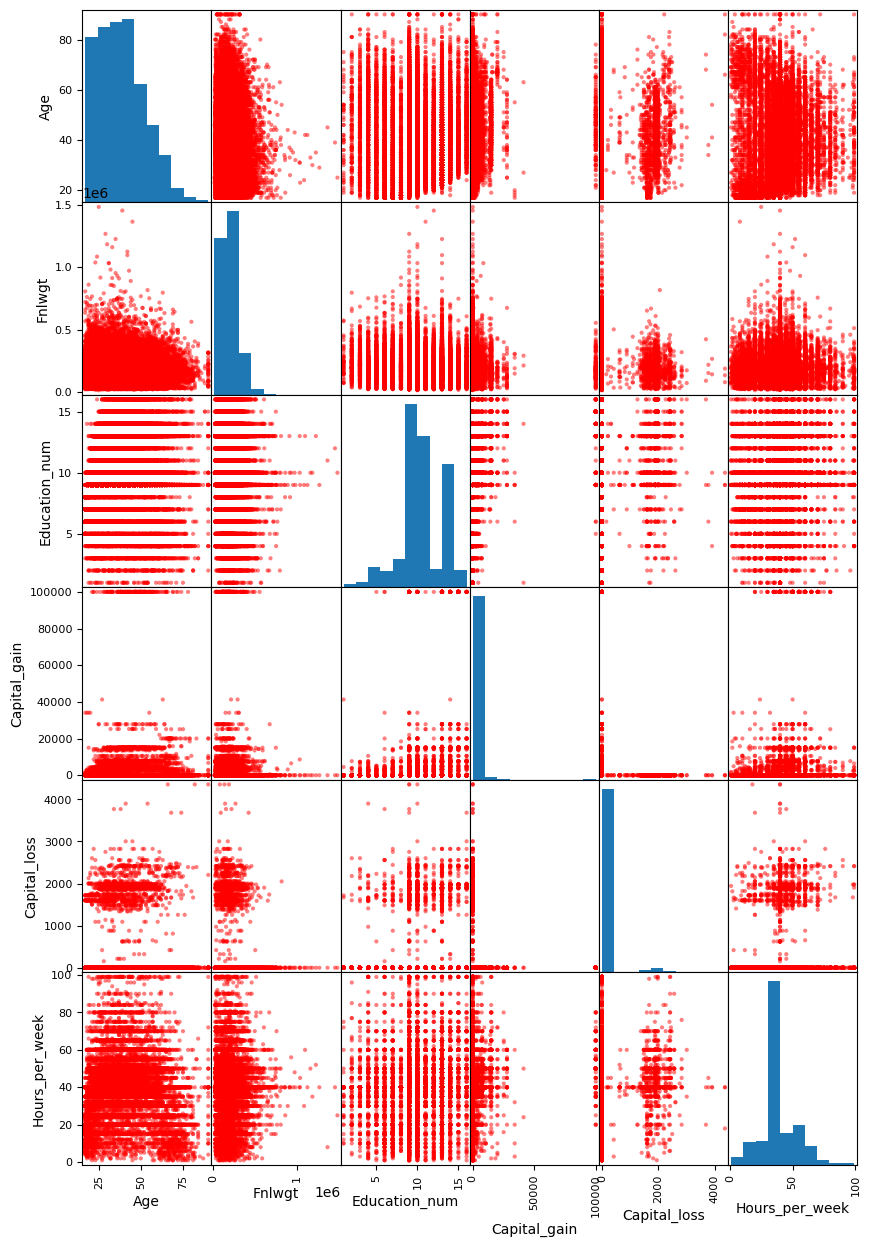

In [48]:
# Importing scatter matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(10,15),color='r')
plt.show()

Using scatter matrix plot to visualize our continuous data. 

# Encoding all Categorical Text Columns To Numbers Using  Ordinal Encoder and Label Encoder Techniques

In [17]:
# Importing the necessary labraries 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [18]:
obj_col.columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [19]:
# Ordinal Encoder
ord_enc = OrdinalEncoder()
data['Workclass'] = ord_enc.fit_transform(data['Workclass'].values.reshape(-1,1))
data['Education'] = ord_enc.fit_transform(data['Education'].values.reshape(-1,1))
data['Marital_status'] = ord_enc.fit_transform(data['Marital_status'].values.reshape(-1,1))
data['Occupation'] = ord_enc.fit_transform(data['Occupation'].values.reshape(-1,1))
data['Relationship'] = ord_enc.fit_transform(data['Relationship'].values.reshape(-1,1))
data['Native_country'] = ord_enc.fit_transform(data['Native_country'].values.reshape(-1,1))
data.sample(n=10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
21531,25,5.0,98756,15.0,10,0.0,0.0,3.0,White,Female,0,0,50,39.0,<=50K
25608,21,4.0,89991,15.0,10,4.0,0.0,3.0,White,Female,0,0,40,39.0,<=50K
30424,36,4.0,108320,11.0,9,0.0,6.0,1.0,White,Male,4101,0,40,39.0,<=50K
26012,22,6.0,197387,11.0,9,4.0,4.0,3.0,White,Male,0,0,40,39.0,<=50K
12147,33,4.0,34748,11.0,9,2.0,0.0,5.0,White,Female,0,1887,20,39.0,>50K
19908,56,4.0,136472,5.0,4,2.0,6.0,0.0,Black,Male,0,0,48,39.0,<=50K
8448,66,4.0,101607,11.0,9,0.0,6.0,1.0,White,Male,0,0,10,39.0,<=50K
29383,55,4.0,189719,9.0,13,2.0,3.0,0.0,White,Male,0,0,45,39.0,>50K
29027,48,4.0,182313,15.0,10,2.0,5.0,0.0,White,Male,0,0,40,39.0,<=50K
1822,19,3.0,263338,15.0,10,4.0,8.0,3.0,White,Male,0,0,45,39.0,<=50K


According to the 10 samples of our data all our text data have been transformed to numerical data.

In [20]:
# Using Label Encoder 
le = LabelEncoder()
data["Race"] = le.fit_transform(data["Race"])
data["Sex"] = le.fit_transform(data["Sex"])
data["Income"] = le.fit_transform(data["Income"])
data.sample(n=10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
23062,36,4.0,280440,7.0,12,4.0,13.0,4.0,4,0,0,0,45,39.0,0
24669,35,4.0,145704,11.0,9,2.0,10.0,5.0,4,0,3942,0,35,39.0,0
10221,18,3.0,137363,15.0,10,4.0,8.0,3.0,4,0,0,0,30,39.0,0
10192,51,0.0,27166,11.0,9,2.0,13.0,0.0,4,1,0,0,40,39.0,0
4733,22,4.0,239806,8.0,11,4.0,7.0,2.0,4,0,0,0,40,25.0,0
7814,33,3.0,190027,11.0,9,4.0,8.0,4.0,2,0,0,0,20,39.0,0
18103,41,4.0,190885,11.0,9,0.0,9.0,1.0,4,0,0,0,40,12.0,0
9355,20,4.0,211345,15.0,10,4.0,5.0,3.0,4,0,0,0,20,39.0,0
30779,29,6.0,405083,11.0,9,4.0,12.0,1.0,4,1,0,0,40,39.0,0
22711,28,4.0,181776,15.0,10,4.0,0.0,1.0,4,0,0,0,40,39.0,0


In [21]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,3.0,0.0,4,1,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,5.0,1.0,4,1,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,5.0,0.0,2,1,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2,0,0,0,40,4.0,0
4,37,4.0,284582,12.0,14,2.0,3.0,5.0,4,0,0,0,40,39.0,0


I have decided to use Label Encoder techniques to encode Race, Sex and the Target variable. And we can get clearity from the first 5 rows of our data frame. 

In [22]:
data.shape

(32536, 15)

After applying encoding techniques, there was not an increase in our columns. 

In [23]:
data.nunique().to_frame('Confirming Unique Vlaues')

,Confirming Unique Vlaues
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


This is to confirm that after applying the encoding techniques all our unique values in encoded class still remain same. 

In [24]:
# Checking the datatype after applying encoding techniques 
data.dtypes

Age                 int64
Workclass         float64
Fnlwgt              int64
Education         float64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race                int32
Sex                 int32
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country    float64
Income              int32
dtype: object

our data types contains float64, int32 and int64. There are no more object columns, that shows that we have trabsformed our text data to numerical data. 

# Checking data Distribution

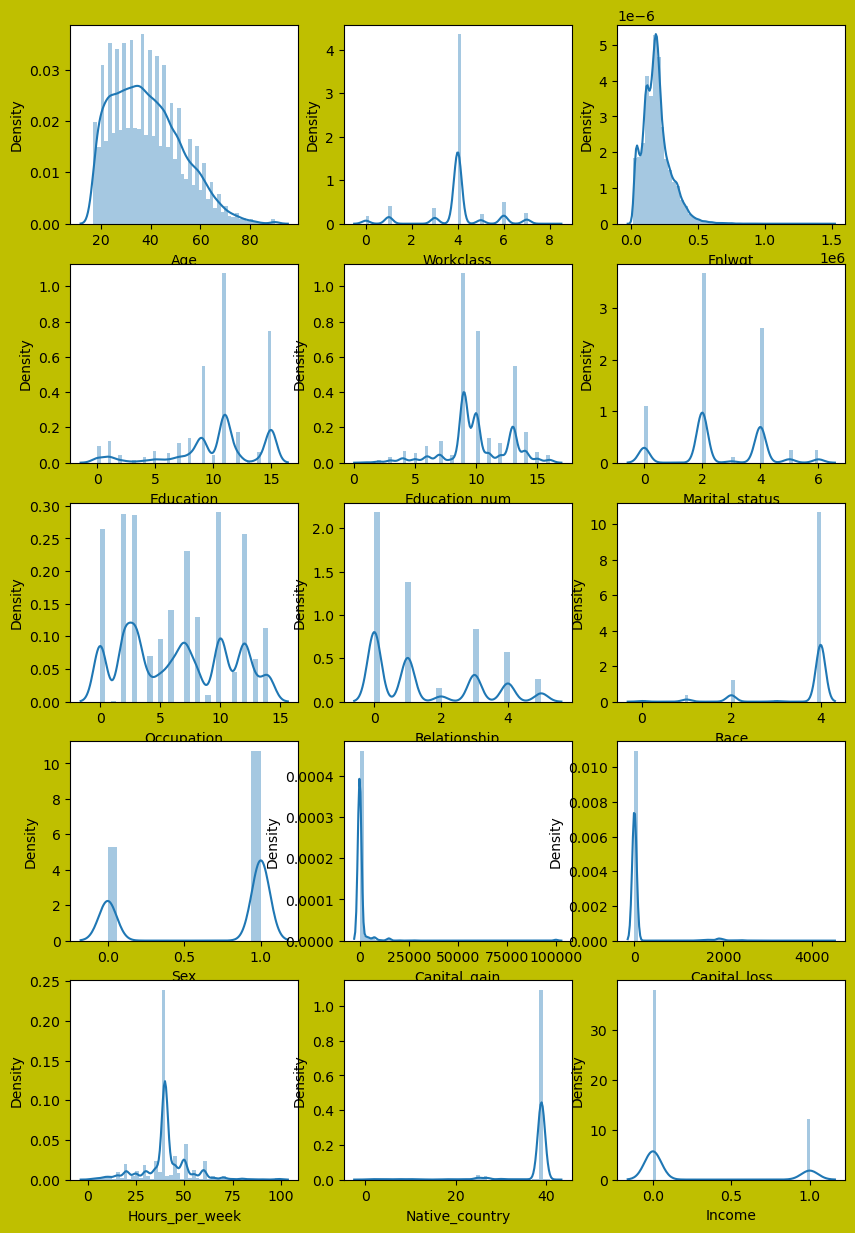

In [25]:
# Checking the data distribution 
plt.figure(figsize=(10,15), facecolor='y')
plotnumber = 1
for column in data:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize= 10)
    plotnumber +=1
plt.show()

The above distplot show the distribution of the data, which fellows almost normal bell shape cure and we can observe skewness in our numerical columns. 

In [26]:
# skewness values +0.5 : -0.5
data.skew()

Age                0.557657
Workclass         -0.658999
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.119480
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -3.902282
Income             1.211640
dtype: float64

We can see that the data is been skewed in Age,Capital_gain, capital_loss 

Before treating the skewness lets check for outliers. 

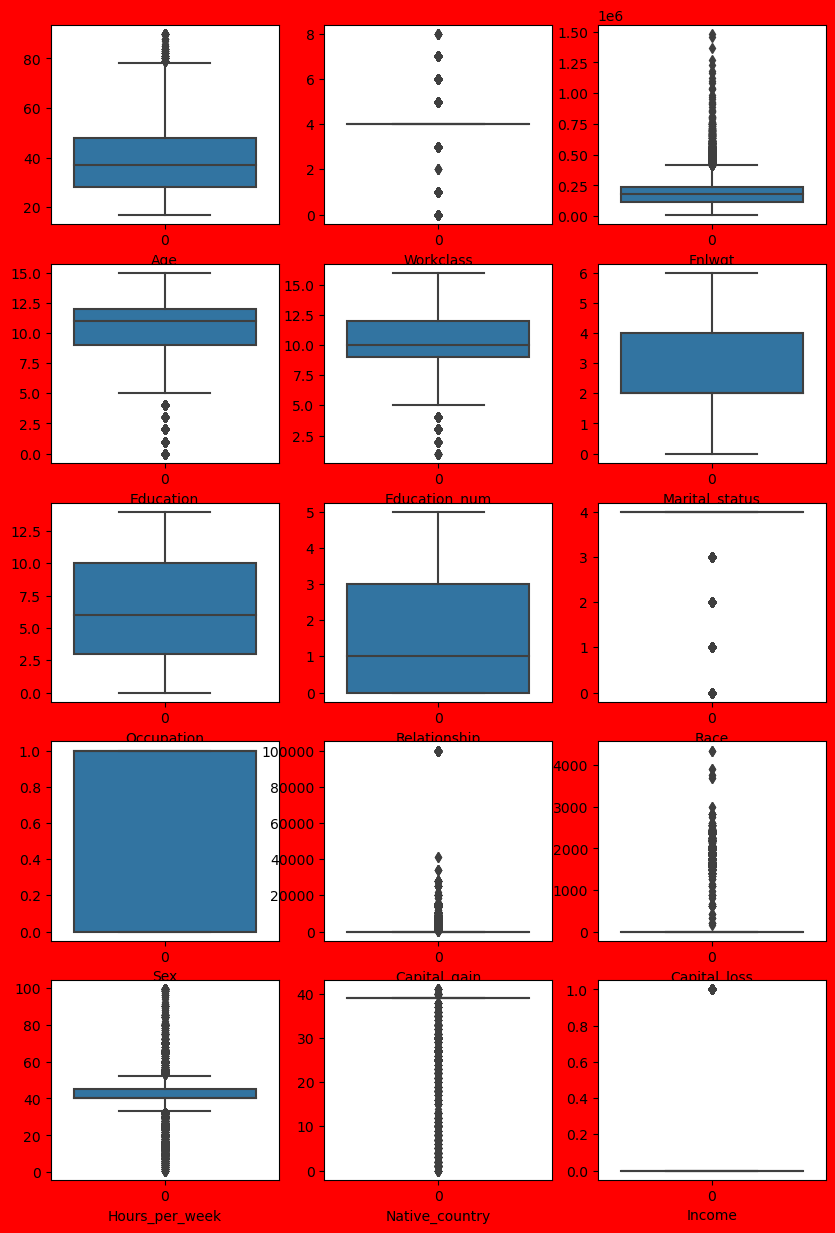

In [27]:
# Checking for Outliers using boxplot
plt.figure(figsize=(10,15), facecolor='r')
plotnumber = 1
for column in data:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize= 10)
    plotnumber +=1
plt.show()

# Using Z Score to remove outliers 

In [28]:
from scipy.stats import zscore
zscore=np.abs(zscore(data))
threshold=3
new_data=data[(zscore<3).all(axis=1)]
print('Shape of the Data Frame:',data.shape)
print('Old Data Frame:', data.shape[0])
print('New Data Frame:', new_data.shape[0])
print('percentage of loss of data by zscore is :',(data.shape[0]-new_data.shape[0])/data.shape[0]*100)

Shape of the Data Frame: (32536, 15)
Old Data Frame: 32536
New Data Frame: 27763
percentage of loss of data by zscore is : 14.669904106220802


After applying the Z score meothod removing outliers we loss 14% of data which is more than 10% but we have enough 27763 rows left which is more than sufficient for model building and prediction.

In [29]:
# skewness values +0.5 : -0.5
new_data.skew()

Age                0.484855
Workclass         -0.663507
Fnlwgt             0.629184
Education         -0.955853
Education_num     -0.145432
Marital_status    -0.045123
Occupation         0.132191
Relationship       0.753529
Race              -2.585947
Sex               -0.689396
Capital_gain       4.929937
Capital_loss      29.510814
Hours_per_week    -0.358912
Native_country    -4.368853
Income             1.321803
dtype: float64

# Reducing skewness Using Cube Root 

In [30]:
new_data['Age'] = np.cbrt(new_data['Age'])
new_data['Capital_gain'] = np.cbrt(new_data['Capital_gain'])
new_data['Capital_loss'] = np.cbrt(new_data['Capital_loss'])

In [31]:
new_data.skew()

Age                0.061395
Workclass         -0.663507
Fnlwgt             0.629184
Education         -0.955853
Education_num     -0.145432
Marital_status    -0.045123
Occupation         0.132191
Relationship       0.753529
Race              -2.585947
Sex               -0.689396
Capital_gain       3.367673
Capital_loss      25.623417
Hours_per_week    -0.358912
Native_country    -4.368853
Income             1.321803
dtype: float64

We have reduce the skewness from continuous data. 

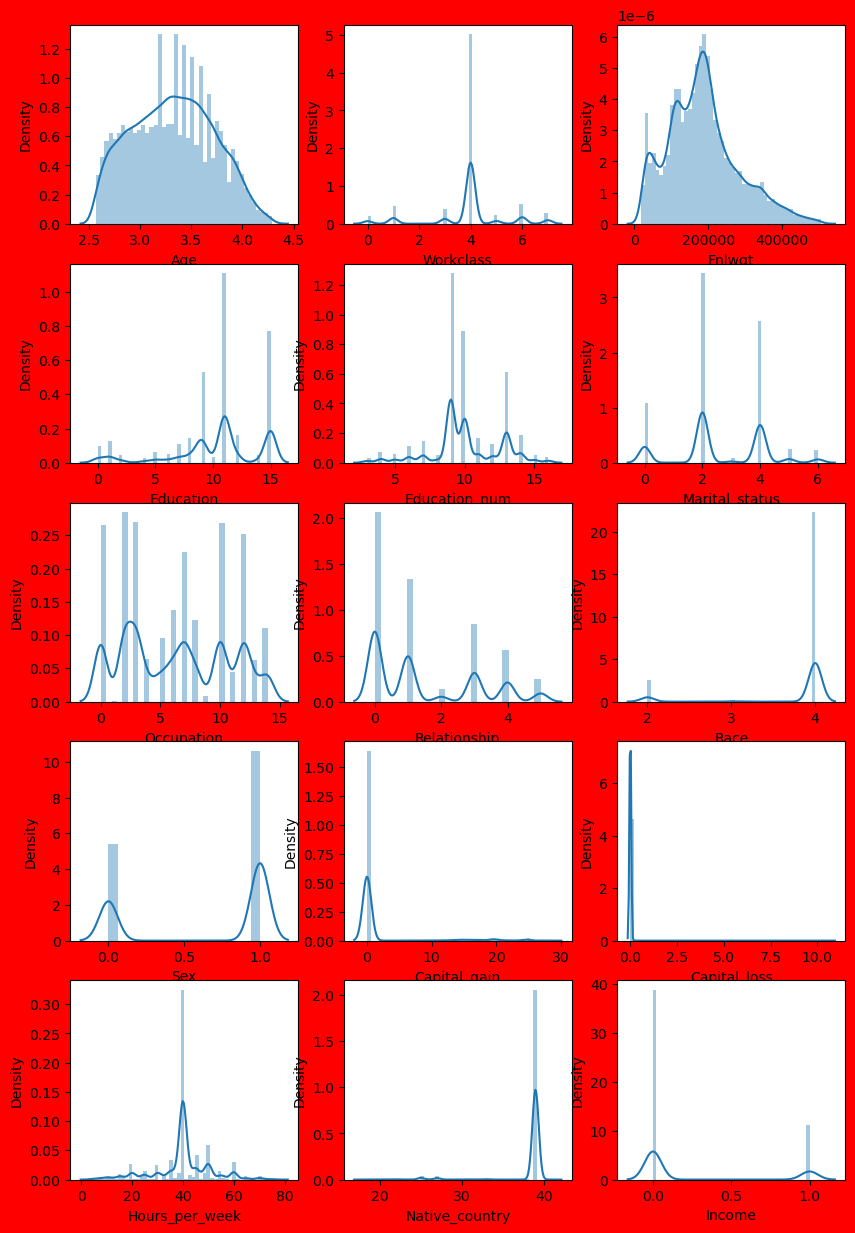

In [32]:
# Checking the distribution after reducing the skewness 
plt.figure(figsize=(10,15), facecolor='r')
plotnumber = 1
for column in new_data:
    if plotnumber <= 15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(new_data[column])
        plt.xlabel(column,fontsize= 10)
    plotnumber +=1
plt.show()

Fellows bell curve almost normally distributed and better compared to the previous distribution. 

# Visualizing the correlation between features and target

In [33]:
new_data.corr()['Income'].sort_values()

Relationship     -0.247808
Marital_status   -0.193924
Capital_loss     -0.017249
Fnlwgt           -0.011578
Workclass        -0.008983
Native_country    0.040641
Occupation        0.047083
Education         0.070967
Race              0.094717
Sex               0.211575
Hours_per_week    0.233028
Age               0.263474
Capital_gain      0.313321
Education_num     0.319815
Income            1.000000
Name: Income, dtype: float64

In [34]:
new_data.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.001843,-0.076389,0.009832,0.070285,-0.323675,-0.005347,-0.285054,0.015939,0.099802,0.135213,0.022549,0.139963,0.028710,0.263474
Workclass,0.001843,1.000000,-0.021957,-0.001866,-0.014495,-0.016766,-0.010860,-0.059881,0.070547,0.074242,0.003002,-0.011898,0.046698,-0.005911,-0.008983
Fnlwgt,-0.076389,-0.021957,1.000000,-0.021224,-0.039999,0.029410,-0.002356,0.014937,-0.102290,0.023176,-0.005672,0.001868,-0.018391,-0.094842,-0.011578
Education,0.009832,-0.001866,-0.021224,1.000000,0.346978,-0.037096,-0.033319,-0.009565,0.026682,-0.031359,0.022567,-0.000511,0.059774,0.082841,0.070967
Education_num,0.070285,-0.014495,-0.039999,0.346978,1.000000,-0.058466,0.100714,-0.093074,0.082721,0.004239,0.133135,0.006808,0.156206,0.113797,0.319815
Marital_status,-0.323675,-0.016766,0.029410,-0.037096,-0.058466,1.000000,0.026761,0.184079,-0.084501,-0.126218,-0.071908,-0.017743,-0.196910,-0.035736,-0.193924
Occupation,-0.005347,-0.010860,-0.002356,-0.033319,0.100714,0.026761,1.000000,-0.047740,0.007558,0.053397,0.014232,-0.001812,-0.002711,0.013534,0.047083
Relationship,-0.285054,-0.059881,0.014937,-0.009565,-0.093074,0.184079,-0.047740,1.000000,-0.146262,-0.576996,-0.090364,0.035483,-0.262940,-0.007887,-0.247808
Race,0.015939,0.070547,-0.102290,0.026682,0.082721,-0.084501,0.007558,-0.146262,1.000000,0.125021,0.033415,-0.001533,0.057073,0.040746,0.094717
Sex,0.099802,0.074242,0.023176,-0.031359,0.004239,-0.126218,0.053397,-0.576996,0.125021,1.000000,0.070595,-0.031887,0.236925,-0.016314,0.211575


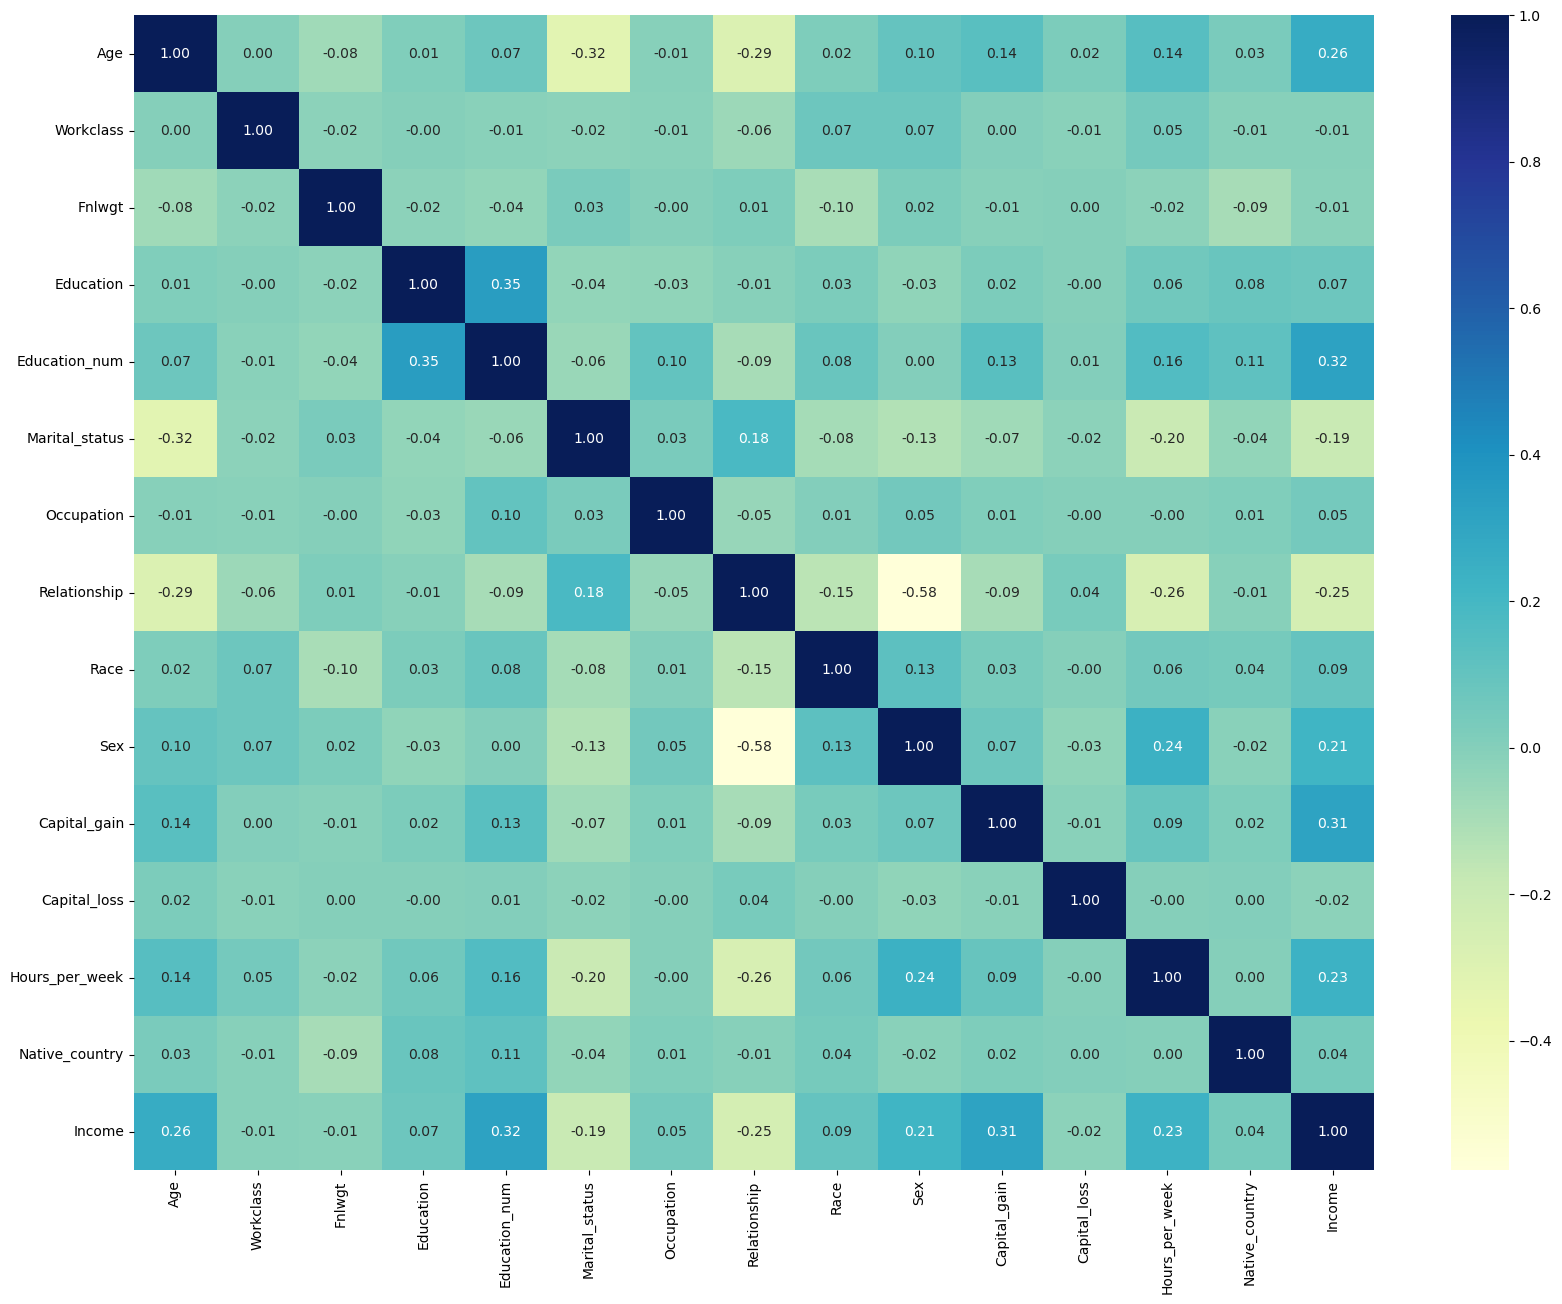

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(new_data.corr(),annot = True, fmt ='.2f',linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.show()

The above heapmap show there are no multicollinearity issues. There is no strong relationship between features that mean no features are correlated with each other. 

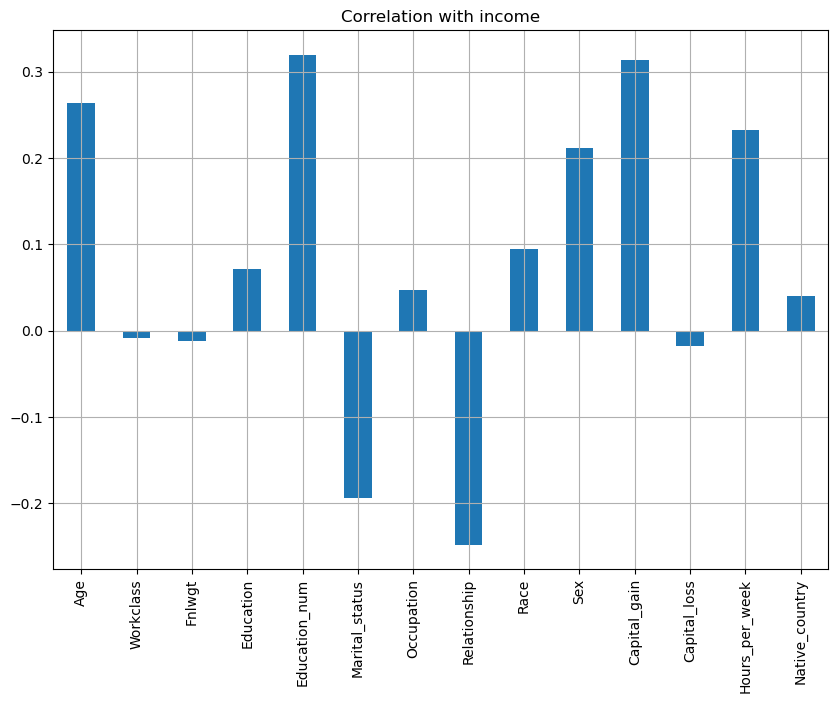

In [36]:
new_data.drop('Income',axis= 1).corrwith(new_data.Income).plot(kind = 'bar', grid=True,figsize=(10, 7),
                                                  title='Correlation with income')

plt.show()

The above bar plot shows correlationship between target and features, as we can see Workclass,fnlwght and Capital_loss fell on zero line meaning they have no relatipnship with target varaibles. But in this case I will not be dropping any of this columns simply because I have loss 14% of my data while removing the outliers and I can't afford to loss another data which will help in my model training and prediction. 

# Seperating our data into X and Y 


In [37]:
x = new_data.drop(['Income'],axis=1)
y= new_data.Income

# Balancing Target Variable Using SMOT Techniques 

In [38]:
# Counter module to count each class
from collections import Counter
Counter(y)

Counter({0: 21535, 1: 6228})

In [39]:
# importing over smapling 
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x, y1 = oversample.fit_resample(x, y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of Classes after fit {}".format(Counter(y1)))

The number of classes before fit Counter({0: 21535, 1: 6228})
The number of Classes after fit Counter({0: 21535, 1: 21535})


We have successfully balanced our target variable.

# Scaling the data and spliting it intoTrain and Test

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# scaling the data 
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

Features has been scaled to avoid bianess.

# Machine learning 


In [49]:
# Importing the necessary libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
dc = DecisionTreeClassifier()
lr = LogisticRegression()
rdf = RandomForestClassifier()
etr = ExtraTreesClassifier()
svc = SVC()
knn = KNeighborsClassifier()
gdb = GradientBoostingClassifier()
ada = AdaBoostClassifier()
xgb = xgb.XGBClassifier() 

models = [dc,lr,rdf,etr,svc,knn,gdb,ada,xgb]

In [43]:
for model in models:
    x_train, x_test, y_train, y_test= train_test_split(x,y1,test_size= 0.25, random_state=45)
    
    model.fit(x_train, y_train)
    model.fit(x_test, y_test)
    y_pred = model.predict(x_test)
      
    
    
    print(f'*************************{model}*************************')
    print('Train score:', model.score(x_train,y_train)*100) # checking model training score 
    print('Test Score:', model.score(x_test,y_test)*100) # checking model testing score 
    print ("The Accuracy is: ", accuracy_score(y_test, y_pred)*100)
    print ("The CV score is: ",(cross_val_score(model, x, y1, cv=5).mean())*100) #Cross Validation Score taken as 5
    print ("Difference between Accuracy_Score and CV score is: ",((accuracy_score(y_test, y_pred)*100)-((cross_val_score(model, x, y1, cv=5).mean())*100)))
    print ('\n')
   
    print("The Confusion Matrix is: \n", confusion_matrix(y_test, y_pred))
    print ('\n')
    
       
    print("Classification Report: \n", classification_report(y_test, y_pred))
    print ("="*65)
    print('\n')

*************************DecisionTreeClassifier()*************************
Train score: 84.95139619837781
Test Score: 100.0
The Accuracy is:  100.0
The CV score is:  85.2681680984444
Difference between Accuracy_Score and CV score is:  14.759693522173208


The Confusion Matrix is: 
 [[5402    0]
 [   0 5366]]


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5402
           1       1.00      1.00      1.00      5366

    accuracy                           1.00     10768
   macro avg       1.00      1.00      1.00     10768
weighted avg       1.00      1.00      1.00     10768



*************************LogisticRegression()*************************
Train score: 49.944275896229335
Test Score: 50.167161961367015
The Accuracy is:  50.167161961367015
The CV score is:  53.04156025075459
Difference between Accuracy_Score and CV score is:  -2.874398289387578


The Confusion Matrix is: 
 [[5402    0]
 [5366    0]]


### The above models result shows that SVM is our best model with an Accuracy score 52 and Cross Validation: 52. Simply because svc  has the least score between cross validation and accuracy which is 0.45

# Hyper Parameter Tunning RandomizedSearchCV

In [55]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [58]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [47,50,60,70], 'learning_rate':[0.09,0.25,0.30]}

In [59]:
rdm_scv = RandomizedSearchCV(AdaBoostClassifier(),cv=5, param_distributions = params)
rdm_scv.fit(x_train,y_train)# Training RandomizedSearchCV 

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.09, 0.25, 0.3],
                                        'n_estimators': [47, 50, 60, 70]})

In [60]:
# Best Estimator 
rdm_scv.best_estimator_

AdaBoostClassifier(learning_rate=0.3, n_estimators=70)

In [61]:
final_model= AdaBoostClassifier(learning_rate=0.25,n_estimators=70)

final_fit= final_model.fit(x_train,y_train) # Final fit
final_pred = final_model.predict(x_test) 
print ("The final Accuracy is: ", accuracy_score(y_test, final_pred)*100)
print ("The final CV score is: ",(cross_val_score(final_model, x, y1, cv=5).mean())*100)

The final Accuracy is:  86.47845468053492
The final CV score is:  85.92291618295796


# After tuning the final model the accuracy and cv score did not increased

# AUC ROC Curve

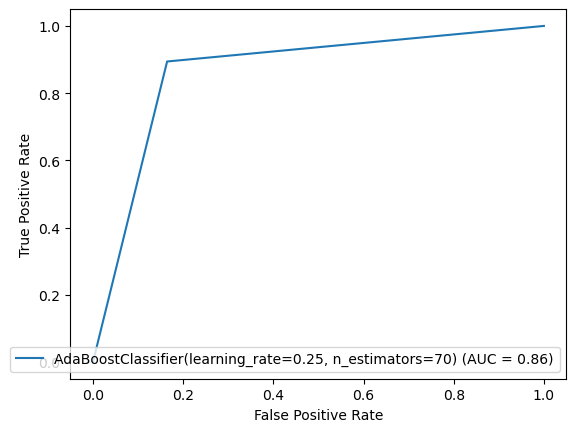

In [62]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, final_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc, estimator_name = final_model)
display.plot()

Achieved final accuracy score of 86.47% and Cross Validation Score of 85.92% and also AUC score is 100% which is fantastic.

# Saving Final  Model 

In [63]:
import pickle
filename = 'Census_Income_Proj_classification.pkl'
pickle.dump(final_model, open(filename, 'wb'))

# Predicting with saved model

In [64]:
actual=np.array(y_test)
model_pred =np.array(final_model.predict(x_test))
df_ac_pred = pd.DataFrame({"original":actual,"predicted":final_pred},index= range(len(actual)))
df_ac_pred

,original,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
10763,1,1
10764,0,0
10765,1,1
10766,1,1
